<a href="https://colab.research.google.com/github/smybilginn/neural_networks_midterm_assignment/blob/main/ysa_vize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Kod Açıklaması

Bu hücrede proje boyunca kullanılacak temel kütüphaneler içe aktarılmaktadır:

**load_breast_cancer**: Scikit-learn içindeki hazır meme kanseri veri setini yüklemek için kullanılır.

**accuracy_score ve confusion_matrix**: Modelin performansını ölçmek için doğruluk oranı ve karışıklık matrisi hesaplamada kullanılır.

**train_test_split**: Veri setini eğitim ve test olarak ikiye ayırmaya yarar.

**StandardScaler**: Özellikleri standart ölçeklemeye tabi tutarak modelin daha sağlıklı öğrenmesini sağlar.

**pandas (pd)**: Veri analizi ve DataFrame işlemleri için kullanılır.

**numpy (np)**: Sayısal hesaplamalar ve dizi işlemleri için kullanılır.

**matplotlib.pyplot (plt)**: Grafik ve görselleştirme işlemlerinde kullanılır.

In [ ]:
#1.2
cancer = load_breast_cancer()

# Özellik (feature) verilerini ve sütun isimlerini kullanarak bir DataFrame oluşturuyoruz
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

# 'target' sütunu olarak sınıf etiketlerini (0 = malign, 1 = benign) ekliyoruz
df['target'] = cancer.target

#	X (özellikler) ve y (hedef) değişkenlerini ayırıyoruz
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target, name='target')

# İlk 5 satırı gösteriyoruz
print(df.head())



   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

##Bu bölümde Breast Cancer veri seti yüklenmiş ve işlenebilir bir DataFrame’e dönüştürülmüştür:

load_breast_cancer() fonksiyonu ile hazır meme kanseri veri seti projeye aktarılır.

Veri setindeki özellikler (cancer.data) ve bu özelliklerin isimleri (cancer.feature_names) kullanılarak bir DataFrame (df) oluşturulur.

Veri setinin sınıf etiketleri olan target değeri (0 = malign, 1 = benign) DataFrame’e ek bir sütun olarak eklenir.

Modelde girdi olarak kullanılacak X (özellikler) ve çıktı olarak kullanılacak y (hedef sınıf) değişkenleri ayrı olarak tanımlanır.

Son olarak veri setinin yapısını görmek için ilk 5 satır (df.head()) ekrana yazdırılır.

In [ ]:
#2. Veri Seti Kalite Kontrolleri
# 2.1 Eksik değer kontrolü
missing_values = df.isnull().sum()
print("Eksik değer sayısı her sütunda:\n", missing_values)

# 2.2. Eksik değer varsa doldurma (örnek: ortalama ile doldurma)
# Bu veri setinde eksik yok ama kod genel kullanım için:
df.fillna(df.mean(), inplace=True)

# Kontrol
print("\nEksik değer kontrolü sonrası:\n", df.isnull().sum())

Eksik değer sayısı her sütunda:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

Eksik değer kontrolü sonrası:
 mean radius            

##2. Veri Seti Kalite Kontrolleri
###2.1 Eksik Değer Kontrolü

Bu adımda veri setindeki eksik değerler incelenmiştir:

df.isnull().sum() komutu her sütundaki eksik değer sayısını hesaplar.

Sonuçlar ekrana yazdırılarak hangi değişkenlerde eksik veri olup olmadığı kontrol edilir.

Bu veri setinde eksik değer bulunmadığından veri temizleme adımı zorunlu değildir.

###2.2 Eksik Değerleri Doldurma (Genel Kullanım İçin)

Kodun bu kısmı örnek amaçlıdır:

df.fillna(df.mean(), inplace=True): Eksik değerlerin olması durumunda, her sütundaki ortalama değer ile doldurmayı sağlar.

Breast Cancer veri setinde eksik değer olmadığı için bu işlem aslında veri üzerinde bir değişiklik yaratmaz ama kodun yeniden kullanılabilirliğini artırır.

Kontrol Sonrası

Eksik değer doldurma işleminden sonra tekrar kontrol edilerek tüm sütunlarda eksik değer olup olmadığı doğrulanır.

In [ ]:
# Her sütun için istenen istatistiksel özellikleri hesapla
# describe() metodu mean, std, min, max, Q1 (25%), Q2 (50% - median) ve Q3 (75%) değerlerini sağlar
statistical_properties = df.describe()
display(statistical_properties)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


##İstatistiksel Özelliklerin Hesaplanması

Bu adımda veri setindeki tüm sayısal sütunların temel istatistiksel değerleri hesaplanmıştır:

df.describe() fonksiyonu her özellik için şu bilgileri üretir:

**count**: Gözlem sayısı

**mean**: Ortalama

**std**: Standart sapma

**min**: En küçük değer

**25% (Q1)**: Birinci çeyreklik

**50% (Q2 - median)**: Medyan

**75% (Q3)**: Üçüncü çeyreklik

**max**: En büyük değer

Bu özet tablo, veri setinin dağılımını ve özelliklerin genel yapısını anlamak için kullanılır. Özellikle modelden önce veri dağılımını incelemek, aykırı değer ya da ölçek farklılıklarını tespit etmeye yardımcı olur.

```
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.790000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  radius error  texture error  \
count     569.000000              569.000000    569.000000     569.000000   
mean        0.181162                0.062798      0.405172       1.216853   
std         0.027414                0.007060      0.277313       0.551648   
min         0.106000                0.049960      0.112400       0.360200   
25%         0.161900                0.057700      0.232400       0.833900   
50%         0.179200                0.061540      0.324200       1.108000   
75%         0.195700                0.066120      0.478900       1.474000   
max         0.304000                0.097440      2.873000       4.885000   

       perimeter error   area error  smoothness error  compactness error  \
count       569.000000   569.000000        569.000000         569.000000   
mean          2.867490   40.337079          0.007041           0.025478   
std           2.021855   45.491006          0.003003           0.017908   
min           0.757000    6.802000          0.001713           0.002252   
25%           1.606000   17.850000          0.005169           0.013080   
50%           2.287000   24.530000          0.006380           0.020450   
75%           3.357000   45.190000          0.008146           0.032450   
max          21.980000  542.200000          0.031130           0.135400   

       concavity error  concave points error  symmetry error  \
count       569.000000            569.000000      569.000000   
mean          0.031894            0.011796          0.020542   
std           0.030186            0.006170          0.008266   
min           0.000000            0.000000          0.007882   
25%           0.015090            0.007638          0.015160   
50%           0.025890            0.010930          0.018730   
75%           0.042050            0.014710          0.023480   
max           0.396000            0.052790          0.078950   

       fractal dimension error  worst radius  worst texture  \
count               569.000000    569.000000     569.000000   
mean                  0.003795     16.269190      25.677223   
std                   0.002646      4.833242       6.146258   
min                   0.000895      7.930000      12.020000   
25%                   0.002248     13.010000      21.080000   
50%                   0.003187     14.970000      25.410000   
75%                   0.004550     18.790000      29.720000   
max                   0.029840     36.040000      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean         107.261213   880.583128          0.132369           0.254265   
std           33.602542   569.356993          0.022832           0.157336   
min           50.410000   185.200000          0.071170           0.027290   
25%           84.110000   515.300000          0.116600           0.147200   
50%           97.660000   686.500000          0.131300           0.211900   
75%          125.400000  1084.000000          0.146000           0.339100   
max          251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188            0.114606          0.290076   
std           0.208624            0.065732          0.061867   
min           0.000000            0.000000          0.156500   
25%           0.114500            0.064930          0.250400   
50%           0.226700            0.099930          0.282200   
75%           0.382900            0.161400          0.317900   
max           1.170000            0.291000          0.663800   

       worst fractal dimension      target  
count               569.000000  569.000000  
mean                  0.083946    0.627417  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    1.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]
```

In [ ]:
# Pearson korelasyon matrisi oluşturun
correlation_matrix = df.corr(method='pearson')

print("Pearson Korelasyon Matrisi:")
display(correlation_matrix.head()) # Tam matris çok büyük olabileceği için ilk birkaç satırı gösteriyoruz

Pearson Korelasyon Matrisi:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560


##Pearson Korelasyon Matrisi

Bu adımda veri setindeki tüm değişkenler arasındaki ilişki düzeyi incelenmiştir:

df.corr(method='pearson')
Pearson korelasyon katsayısını hesaplayarak tüm özellikler arasındaki doğrusal ilişkiyi ölçer.

Değer aralığı -1 ile 1 arasındadır:

**1’e yakın** → güçlü pozitif ilişki

**-1’e yakın** → güçlü negatif ilişki

**0’a yakın** → ilişki yok veya çok zayıf

Korelasyon matrisi çok büyük olabileceği için yalnızca ilk birkaç satır görüntülenmiştir.

Bu analiz, özellikle model eğitiminden önce hangi değişkenlerin birbirine çok benzediğini (multicollinearity) anlamak için kullanılır.

```
                         mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.323782        0.997855   0.987357   
mean texture                0.323782      1.000000        0.329533   0.321086   
mean perimeter              0.997855      0.329533        1.000000   0.986507   
mean area                   0.987357      0.321086        0.986507   1.000000   
mean smoothness             0.170581     -0.023389        0.207<TRUNCATED original_length=8762>
```

In [ ]:
from sklearn.preprocessing import StandardScaler

# StandardScaler örneği oluştur
scaler = StandardScaler()

# X veri setini ölçeklendir ve X_scaled olarak kaydet
X_scaled = scaler.fit_transform(X)

# Ölçeklendirilmiş verinin ilk 5 satırını görüntüle
print("Ölçeklendirilmiş X_scaled verisi (ilk 5 satır):")
display(pd.DataFrame(X_scaled, columns=X.columns).head())

Ölçeklendirilmiş X_scaled verisi (ilk 5 satır):


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


##Özellik Ölçeklendirme (Standardization)

Bu adımda modelin daha sağlıklı öğrenebilmesi için özellikler standart ölçeklemeye tabi tutulmuştur:

**StandardScaler()**:
Her özelliği ortalaması 0 ve standart sapması 1 olacak şekilde dönüştürür.

Bu işlem, özellikle mesafeye duyarlı algoritmalar (ör. KNN, SVM) veya gradyan tabanlı yöntemler için önemlidir.

**scaler.fit_transform(X)**:

**fit kısmı**: Verinin ortalama ve standart sapmasını öğrenir

**transform kısmı**: Veriyi bu ortalama ve standart sapmaya göre dönüştürür

Dönüştürülmüş veri X_scaled olarak kaydedilir ve ilk 5 satır görüntülenir.

Standardizasyon, farklı ölçeklerdeki özelliklerin model eğitiminde eşit ağırlıkta olmasını sağlar.

In [ ]:
from sklearn.model_selection import train_test_split

# İlk Bölme: Eğitim seti (%70) ve Geçici (Doğrulama + Test) seti (%30)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# İkinci Bölme: Geçici setten Doğrulama (%10) ve Test (%20) setlerinin ayrılması
# X_temp'in %10'unu almak için (ki bu da orijinal verinin %10'una tekabül eder),
# X_temp'in 1/3'ünü doğrulama, 2/3'ünü test olarak ayırmalıyız.
# Yani test_size = 0.20 / 0.30 = 2/3
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=(0.20 / 0.30), random_state=42, stratify=y_temp
)

# Oluşan setlerin boyutlarını kontrol et
print(f"Eğitim seti boyutu: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Doğrulama seti boyutu: X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"Test seti boyutu: X_test: {X_test.shape}, y_test: {y_test.shape}")

# Orijinal veri setinin boyutunu kontrol et
print(f"Orijinal veri seti boyutu: {X_scaled.shape}")

Eğitim seti boyutu: X_train: (398, 30), y_train: (398,)
Doğrulama seti boyutu: X_val: (56, 30), y_val: (56,)
Test seti boyutu: X_test: (115, 30), y_test: (115,)
Orijinal veri seti boyutu: (569, 30)


Eğitim seti boyutu: X_train: (398, 30), y_train: (398,)
Doğrulama seti boyutu: X_val: (56, 30), y_val: (56,)
Test seti boyutu: X_test: (115, 30), y_test: (115,)
Orijinal veri seti boyutu: (569, 30)

##Veri Setinin Eğitim, Doğrulama ve Test Setlerine Bölünmesi

Bu adımda ölçeklendirilmiş veri seti, modelin eğitim ve değerlendirmesi için üç alt kümeye ayrılmıştır:

1. **Eğitim ve Geçici Setin Ayrılması**

train_test_split ile veri setinin %70’i eğitim için, %30’u geçici set için ayrılır.

stratify=y parametresi, sınıf oranlarının eğitim ve geçici setlerde de korunmasını sağlar.

random_state=42 ile bölme işlemi tekrarlanabilir hâle getirilir.

2. **Doğrulama ve Test Setine Ayrılması**

Geçici setten:

%1/3’ü (orijinal veri setinin %10’u) doğrulama (validation) için

%2/3’ü (orijinal veri setinin %20’si) test için ayrılır.

Bu sayede model eğitim sırasında doğrulama seti ile ayarlamalar yapabilir, test seti ile bağımsız performans ölçümü yapılabilir.

3. **Boyut Kontrolü**

Eğitim, doğrulama ve test setlerinin boyutları shape ile kontrol edilir.

Ayrıca, toplam boyutların orijinal veri seti ile uyumlu olduğu doğrulanır.

Bu adım, modelin genelleme yeteneğini doğru şekilde değerlendirmek için kritik öneme sahiptir.

In [ ]:
#2.2 Aykırı Değer (Outlier) Analizi

# IQR yöntemi ile aykırı değer analizi
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Her sütunda aykırı değerleri say
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("Her sütundaki aykırı değer sayısı:\n", outliers)

Her sütundaki aykırı değer sayısı:
 mean radius                14
mean texture                7
mean perimeter             13
mean area                  25
mean smoothness             6
mean compactness           16
mean concavity             18
mean concave points        10
mean symmetry              15
mean fractal dimension     15
radius error               38
texture error              20
perimeter error            38
area error                 65
smoothness error           30
compactness error          28
concavity error            22
concave points error       19
symmetry error             27
fractal dimension error    28
worst radius               17
worst texture               5
worst perimeter            15
worst area                 35
worst smoothness            7
worst compactness          16
worst concavity            12
worst concave points        0
worst symmetry             23
worst fractal dimension    24
target                      0
dtype: int64


**Aykırı Değer (Outlier) Analizi**

Bu adımda veri setindeki aykırı değerler IQR (Interquartile Range) yöntemi ile tespit edilmiştir:

Q1 ve Q3: Her sütunun 1. ve 3. çeyreklik değerleri hesaplanır.

IQR = Q3 - Q1: Çeyreklikler arası mesafe (Interquartile Range) bulunur.

**Aykırı değer kriteri**:

**Alt sınır**: Q1 - 1.5 × IQR

**Üst sınır**: Q3 + 1.5 × IQR

Bu sınırların dışında kalan değerler aykırı olarak kabul edilir.

Her sütunda aykırı değerlerin sayısı hesaplanır ve ekrana yazdırılır.

Aykırı değer analizi, modelin eğitimi sırasında ekstrem değerlerin etkisini anlamak ve gerekirse önlem almak için önemlidir.

In [ ]:
import numpy as np
from scipy.stats import zscore

#Z Score Analizi

# Sadece sayısal sütunları seç (target sütununu hariç tuttuğumuz X DataFrame'i zaten sayısal)
z_scores = np.abs(zscore(X))

# Eşik değeri belirle (genellikle 3 veya 2.5 kullanılır)
threshold = 3

# Her sütunda eşik değerini aşan aykırı değerleri bul
outlier_counts_zscore = (z_scores > threshold).sum(axis=0)

print("Z-Score ile her sütundaki aykırı değer sayısı (eşik: 3):")
print(outlier_counts_zscore)

Z-Score ile her sütundaki aykırı değer sayısı (eşik: 3):
[ 5  4  7  8  5  9  9  6  5  7  7  9  8  6  7 12  6  6 11 10  6  4  6 10
  3 10  7  0  9  9]


##Z-Score ile Aykırı Değer Analizi

Bu adımda veri setindeki aykırı değerler Z-Score yöntemi ile tespit edilmiştir:

zscore(X): Her bir özelliğin standart skorunu (Z-Score) hesaplar:


	​z = (x-μ )/σ


**x** : veri noktası


**μ** : sütunun ortalaması


**σ** : sütunun standart sapması

**np.abs(z_scores)**: Pozitif ve negatif uç değerleri birlikte değerlendirmek için mutlak değer alınır.

**Threshold (eşik değeri)**: Genellikle 3 veya 2.5 olarak seçilir; Z-Score’u bu değeri aşan noktalar aykırı kabul edilir.

**(z_scores > threshold).sum(axis=0)**: Her sütundaki aykırı değerlerin sayısını hesaplar.

Z-Score yöntemi, IQR’a ek olarak ekstrem değerleri tespit etmek için yaygın kullanılır ve özellikle normal dağılıma yakın verilerde etkilidir.

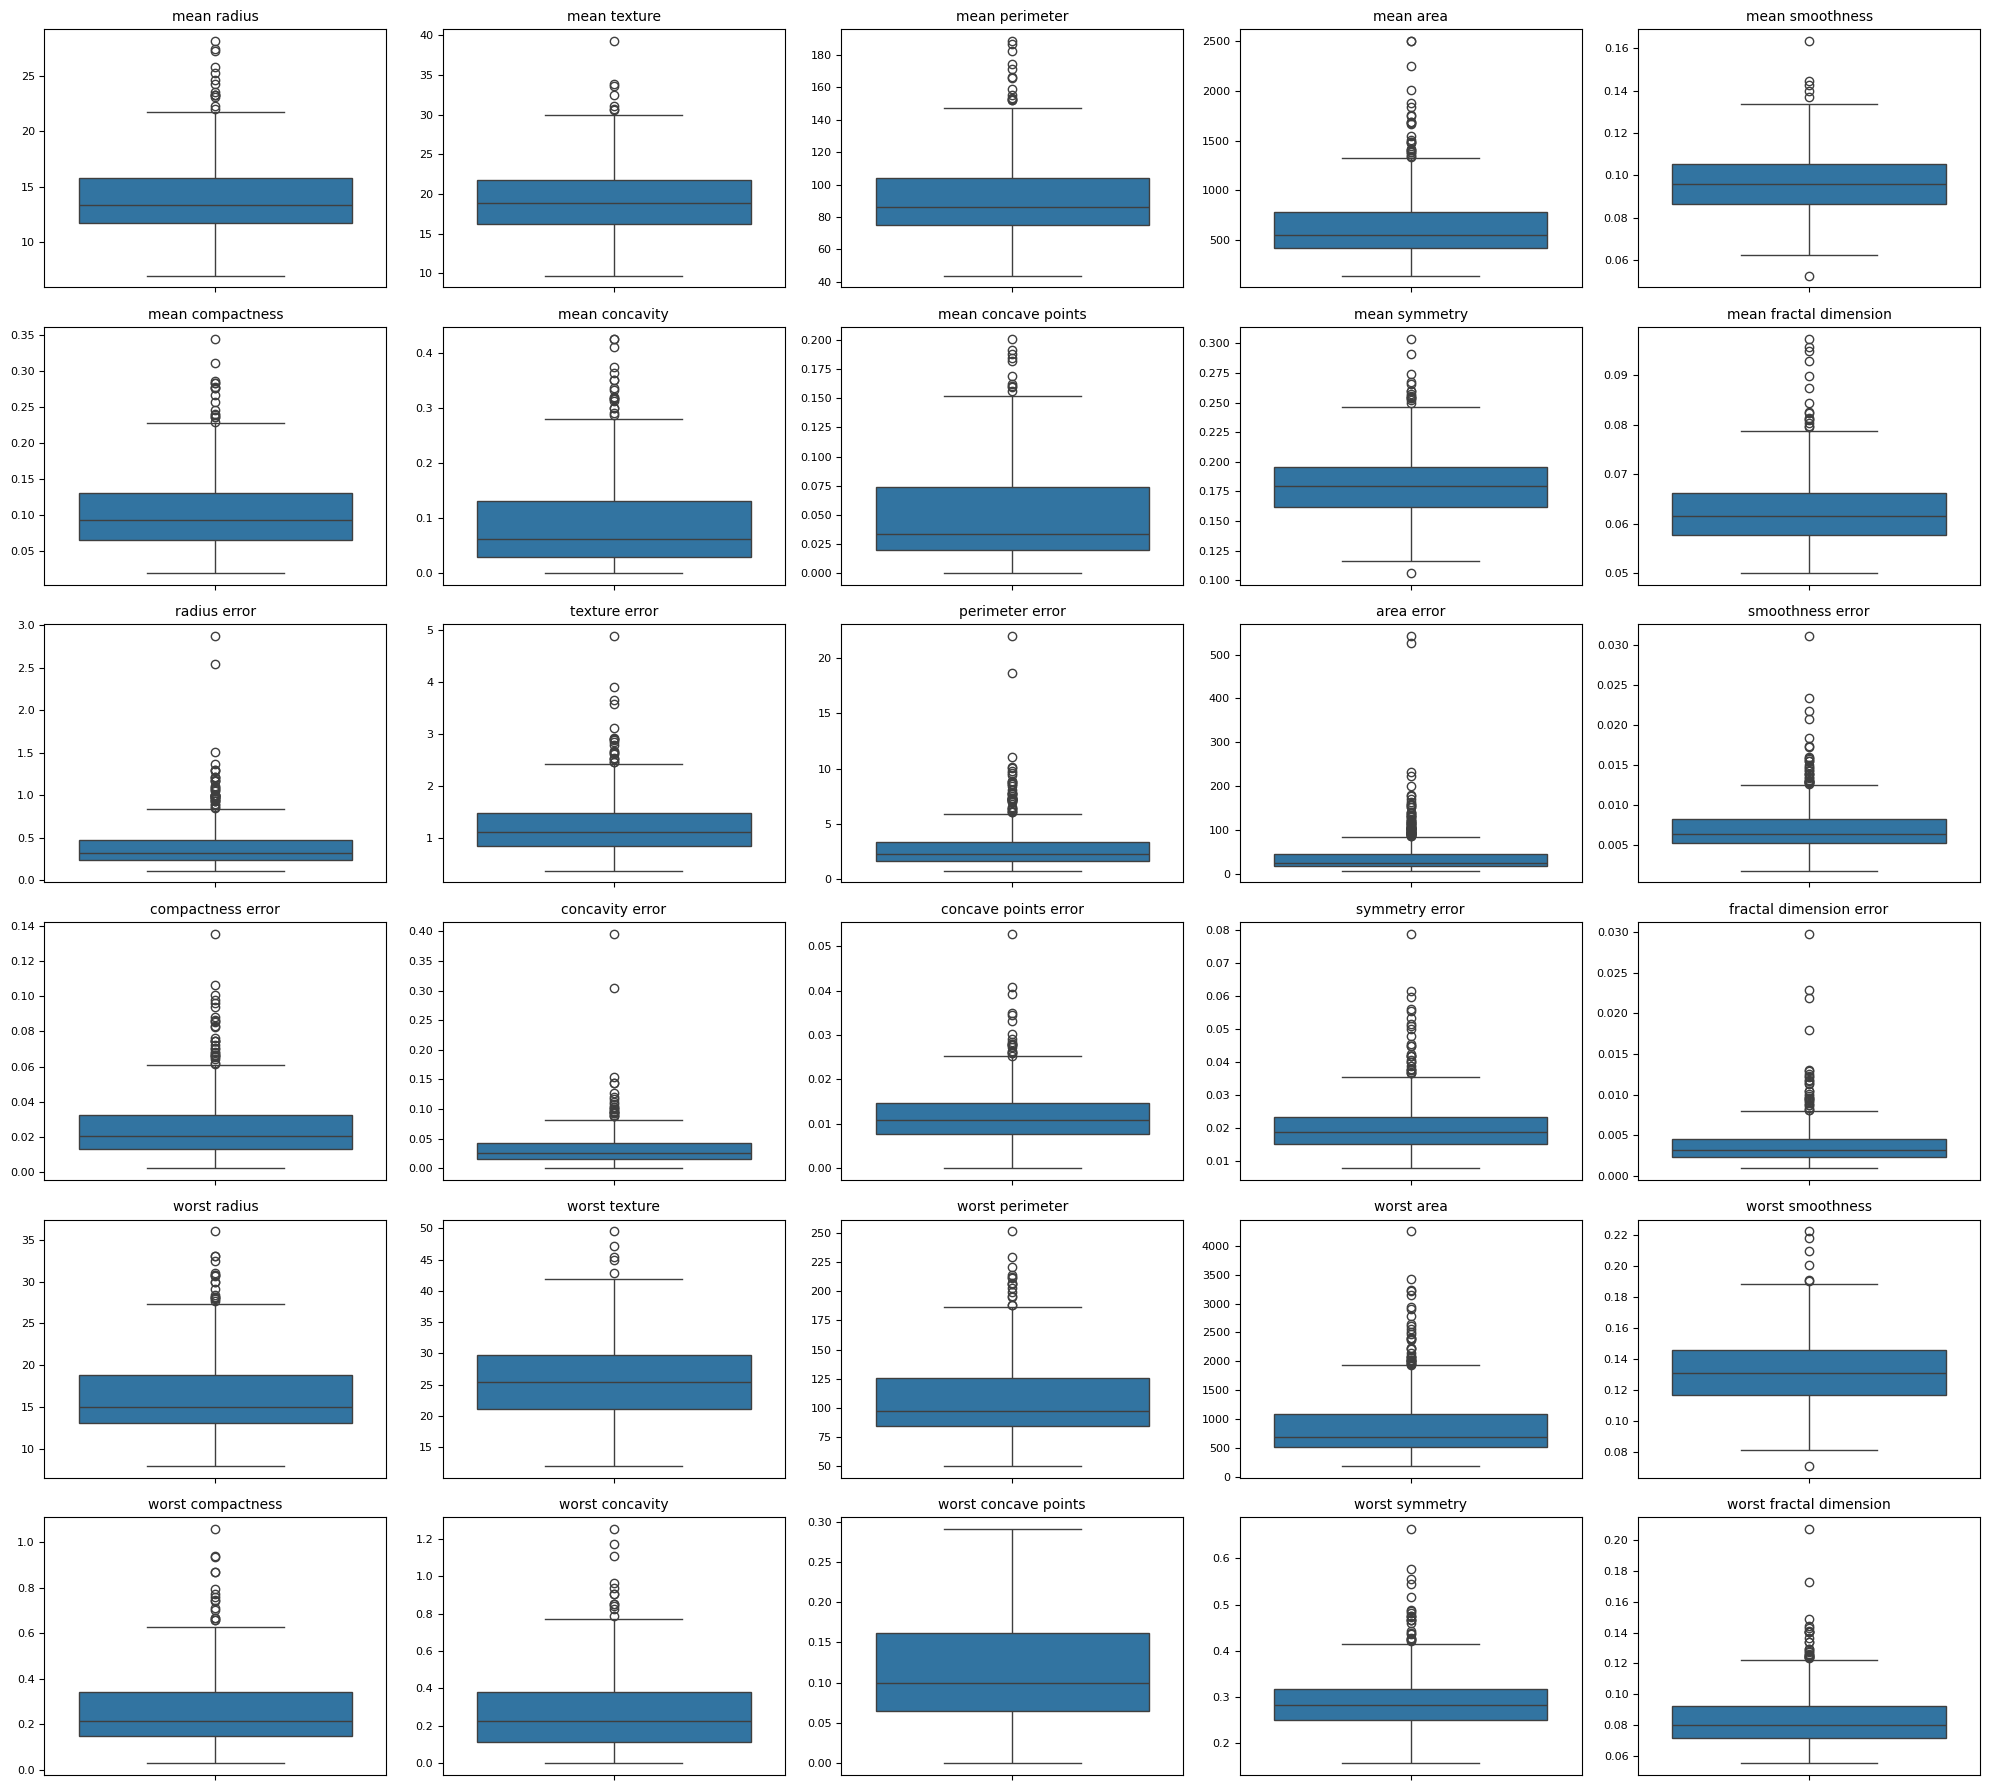

In [ ]:
import seaborn as sns
#Boxplot Analizi

# Özellik sayısını al
num_features = X.shape[1]

# Subplot'lar için uygun bir ızgara boyutu belirle
n_cols = 5 # Her satırda kaç sütun olacağını belirle
n_rows = (num_features + n_cols - 1) // n_cols # Gerekli satır sayısını hesapla

plt.figure(figsize=(n_cols * 4, n_rows * 3))

for i, column in enumerate(X.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=X[column])
    plt.title(column, fontsize=10)
    plt.ylabel('') # Y ekseni etiketlerini kaldırarak daha düzenli bir görünüm sağlar
    plt.xlabel('') # X ekseni etiketlerini kaldır
    plt.tick_params(axis='y', labelsize=8) # Y ekseni etiketlerinin boyutunu küçült

plt.tight_layout()
plt.show()

##Boxplot ile Aykırı Değer Görselleştirme

Bu adımda veri setindeki aykırı değerler görsel olarak incelenmiştir:

**Boxplot (kutu grafiği)**: Her özelliğin dağılımını, medyanını, çeyrekliklerini ve aykırı değerlerini görmemizi sağlar.

**Kutu**: Q1 ve Q3 arasındaki değerleri temsil eder

**Orta çizgi**: Medyan (Q2)

**“Whisker” uçları**: Alt ve üst sınırlar

**Noktalar**: Aykırı değerler

Çok sayıda özellik olduğu için subplot’lar kullanılmış ve her satırda 5 sütun olacak şekilde ızgara oluşturulmuştur.

plt.tight_layout() ile grafikler arasındaki boşluklar düzenlenir, böylece tüm boxplot’lar okunabilir olur.

Boxplot analizi, hem IQR hem de Z-Score yöntemleri ile tespit edilen aykırı değerlerin görselleştirilmesini sağlar.

Bu görselleştirme, veri setindeki ekstrem değerleri hızlıca tanımlamak ve gerekirse işlem yapmak için kullanılır.

### 2.3 Veri Tipi ve Dağılım İncelemesi

In [ ]:
# Sayısal ve kategorik değişken sayılarını raporlama
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns

print(f"Sayısal Değişken Sayısı: {len(numerical_cols)}")
print(f"Kategorik Değişken Sayısı: {len(categorical_cols)}")

print("\nSayısal Sütunlar:")
print(list(numerical_cols))

print("\nKategorik Sütunlar:")
print(list(categorical_cols))

Sayısal Değişken Sayısı: 31
Kategorik Değişken Sayısı: 0

Sayısal Sütunlar:
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension', 'target']

Kategorik Sütunlar:
[]


##Sayısal ve Kategorik Değişkenlerin İncelenmesi

Bu adımda veri setindeki değişkenlerin türleri analiz edilmiştir:

**Sayısal değişkenler (numerical_cols)**:

select_dtypes(include=['number']) ile sayısal tipteki sütunlar seçilir.

Bu sütunlar genellikle modelde doğrudan kullanılabilir ve sayısal işlemler (ölçekleme, istatistiksel analiz) uygulanabilir.

**Kategorik değişkenler (categorical_cols)**:

select_dtypes(exclude=['number']) ile sayısal olmayan sütunlar seçilir.

Bu sütunlar genellikle etiketleme veya one-hot encoding gibi ön işleme adımlarına ihtiyaç duyar.

**Sonuç olarak**:

Sayısal ve kategorik sütunların sayısı ve isimleri ekrana yazdırılır.

Bu adım, veri setinin yapısını anlamak ve model öncesi gerekli işlemleri planlamak için önemlidir.

Breast Cancer veri setinde tüm sütunlar sayısal olduğundan kategorik sütun bulunmamaktadır.

In [ ]:
# Sütunların dtype bilgilerini gösterme
print("\nSütunların Veri Tipleri (dtype bilgileri):\n")
df.info()


Sütunların Veri Tipleri (dtype bilgileri):

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-nu

##Sütunların Veri Tipleri (dtype) İncelemesi

Bu adımda veri setindeki her sütunun veri tipi (dtype) ve temel bilgileri incelenmiştir:

**df.info() fonksiyonu ile**:

Sütun isimleri

Sütunlardaki gözlem sayısı

Veri tipleri (int, float, object vb.)

Bellek kullanımı

gibi bilgiler ekrana yazdırılır.

**Amaç**:

Hangi sütunların sayısal veya kategorik olduğunu doğrulamak

Eksik değer durumunu hızlıca görmek

Bellek kullanımı ve veri tipi uyumsuzluklarını kontrol etmek

Bu adım, veri setinin genel yapısını anlamak ve ön işleme ihtiyaçlarını belirlemek için kritik bir adımdır.

## 3. Keşifsel Veri Analizi (EDA)
### 3.1 İstatistiksel Özellikler

In [ ]:
# Her sütun için istenen istatistiksel özellikleri hesapla
# describe() metodu mean, std, min, max, Q1 (25%), Q2 (50% - median) ve Q3 (75%) değerlerini sağlar
statistical_properties = df.describe()
display(statistical_properties)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


##İstatistiksel Özelliklerin Hesaplanması

Bu adımda veri setindeki tüm sayısal sütunların temel istatistiksel değerleri hesaplanmıştır:

**df.describe() fonksiyonu her özellik için şu bilgileri üretir**:

**count**: Gözlem sayısı

**mean**: Ortalama

**std**: Standart sapma

**min**: En küçük değer

**25% (Q1)**: Birinci çeyreklik

**50% (Q2 - median)**: Medyan

**75% (Q3)**: Üçüncü çeyreklik

**max**: En büyük değer

Bu özet tablo, veri setinin dağılımını ve özelliklerin genel yapısını anlamak için kullanılır. Özellikle model öncesi veri dağılımını ve potansiyel aykırı değerleri gözlemlemek için faydalıdır.

### 3.2 Korelasyon Matrisi

In [ ]:
# Pearson korelasyon matrisi oluşturun
correlation_matrix = df.corr(method='pearson')

print("Pearson Korelasyon Matrisi:")
display(correlation_matrix.head()) # Tam matris çok büyük olabileceği için ilk birkaç satırı gösteriyoruz

Pearson Korelasyon Matrisi:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560


##Pearson Korelasyon Matrisi

Bu adımda veri setindeki tüm değişkenler arasındaki doğrusal ilişkiler Pearson korelasyon katsayısı ile incelenmiştir:

**df.corr(method='pearson')**:

Her sütunun diğer sütunlarla olan doğrusal ilişkisini ölçer.

**Değer aralığı**: -1 ile 1

**1’e yakın** → güçlü pozitif ilişki

**-1’e yakın** → güçlü negatif ilişki

**0’a yakın** → ilişki yok veya çok zayıf

Korelasyon matrisi çok büyük olabileceği için yalnızca ilk birkaç satır görüntülenmiştir.

Bu analiz, özellikle model öncesi çok yüksek korelasyonlu değişkenlerin olup olmadığını anlamak ve multicollinearity riskini değerlendirmek için kullanılır.

#### Heatmap ile Korelasyon Matrisinin Görselleştirilmesi

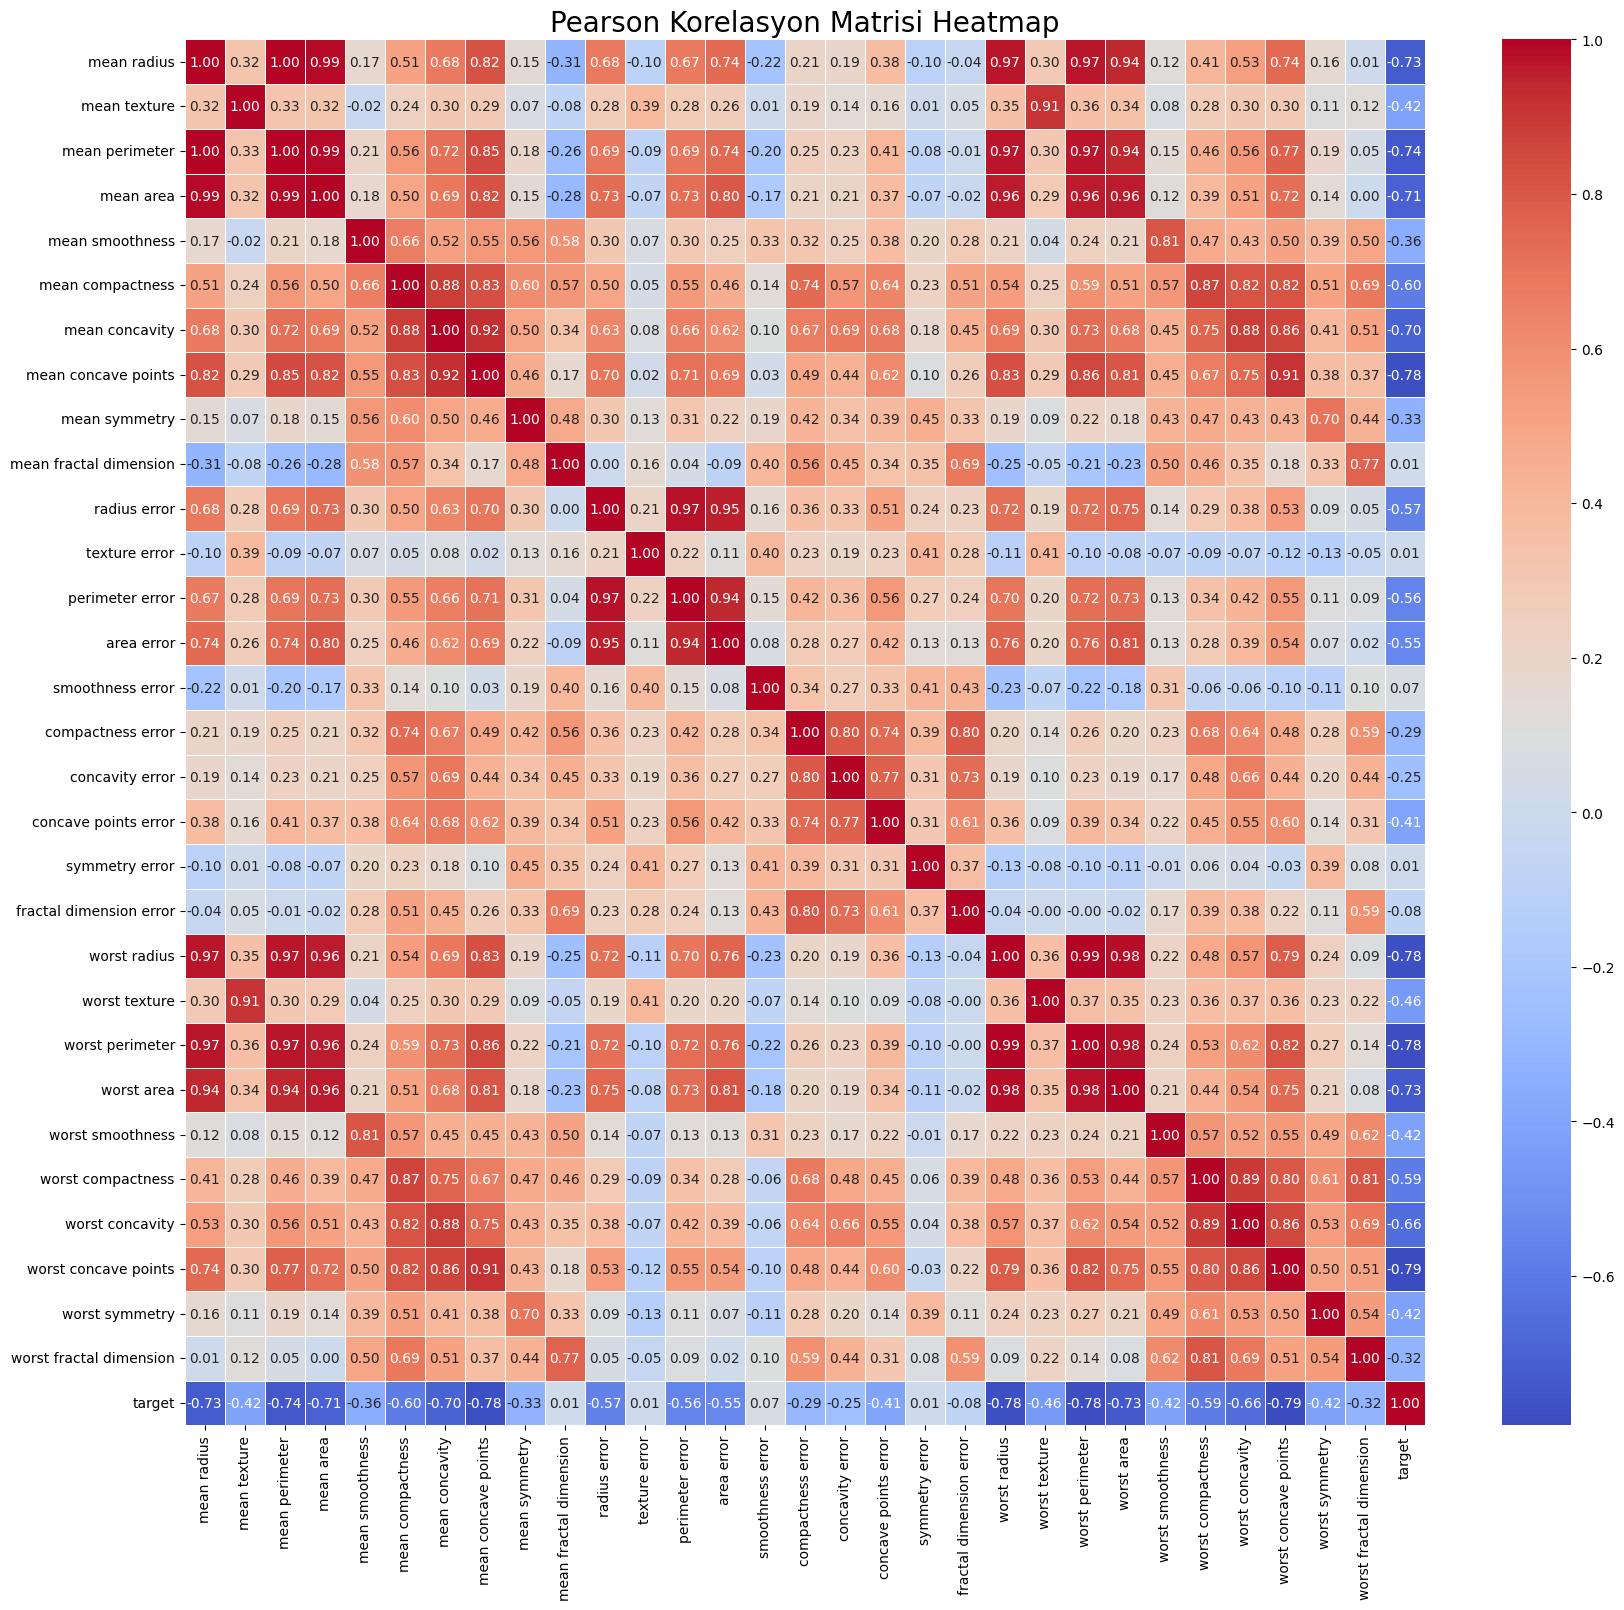

In [ ]:
import seaborn as sns
# Pearson korelasyon matrisi oluşturun (daha önce oluşturulduysa tekrar çalıştırılabilir)
correlation_matrix = df.corr(method='pearson')

plt.figure(figsize=(20, 18)) # Görselleştirme boyutu
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Pearson Korelasyon Matrisi Heatmap', fontsize=20)
plt.show()

**df.corr()**: Veri setindeki tüm sayısal sütunlar arasındaki korelasyon katsayılarını hesaplar.

Pearson yöntemi, değişkenler arasındaki doğrusal ilişkiyi ölçer.

Heatmap, ilişkilerin kuvvetini renklerle gösterir:

🔴 Kırmızı: Güçlü pozitif korelasyon

🔵 Mavi: Güçlü negatif korelasyon

⚪ Beyaz / açık tonlar: Zayıf ya da ilişkisiz değişkenler

Bu görselleştirme, model eğitiminde önemli değişkenlerin belirlenmesi, çoklu doğrusal bağlantıların incelenmesi ve veri setinin yapısının analiz edilmesi için oldukça yararlıdır.

In [ ]:
# Korelasyon matrisinden üst üçgeni alarak tekrar eden çiftleri ve kendisiyle olan korelasyonu çıkarıyoruz
corr_pairs = correlation_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort", ascending=False)

# Kendisiyle olan korelasyonları (1.0) ve tekrar eden çiftleri eleyerek en yüksek 3 korelasyonu bulma
high_corr_pairs = sorted_pairs[sorted_pairs != 1.0]

# İlk 6 çifti al (çünkü A-B ve B-A aynı korelasyonu temsil eder, 3 çift için 6 sonuç olacaktır)
top_3_correlated_pairs = high_corr_pairs[::2].head(3)

print("En yüksek korelasyonlu 3 çift:")
display(top_3_correlated_pairs)

En yüksek korelasyonlu 3 çift:


,,0
mean radius,mean perimeter,0.997855
worst perimeter,worst radius,0.993708
mean radius,mean area,0.987357


**unstack()**
Korelasyon matrisini uzun formata çevirir. Böylece her hücre (değişken1, değişken2) şeklinde bir çift oluşturur.

Tekrar eden çiftlerin atılması
Korelasyon matrisi simetriktir; örneğin:

**mean radius** – mean area

**mean area** – mean radius
aynı korelasyon değerini temsil eder.
Bu nedenle 2'şer atlayarak benzersiz çiftler elde edilir.

Kendisiyle olan korelasyonların çıkarılması

Her değişken kendisiyle 1.0 korelasyona sahiptir; anlamlı bilgi sağlamadığı için listeden çıkarılır.

Sonuç
Kod, veri setindeki değişkenler arasından en güçlü doğrusal ilişkiye sahip 3 çifti bulur.

### Boxplot'lar ile Hedef Değişken Arasındaki İlişkiyi İnceleme

/tmp/ipython-input-1084680459.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=df_combined, palette='viridis')
/tmp/ipython-input-1084680459.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=df_combined, palette='viridis')
/tmp/ipython-input-1084680459.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=df_combined, palette='viridis')
/tmp/ipython-input-1084680459.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be

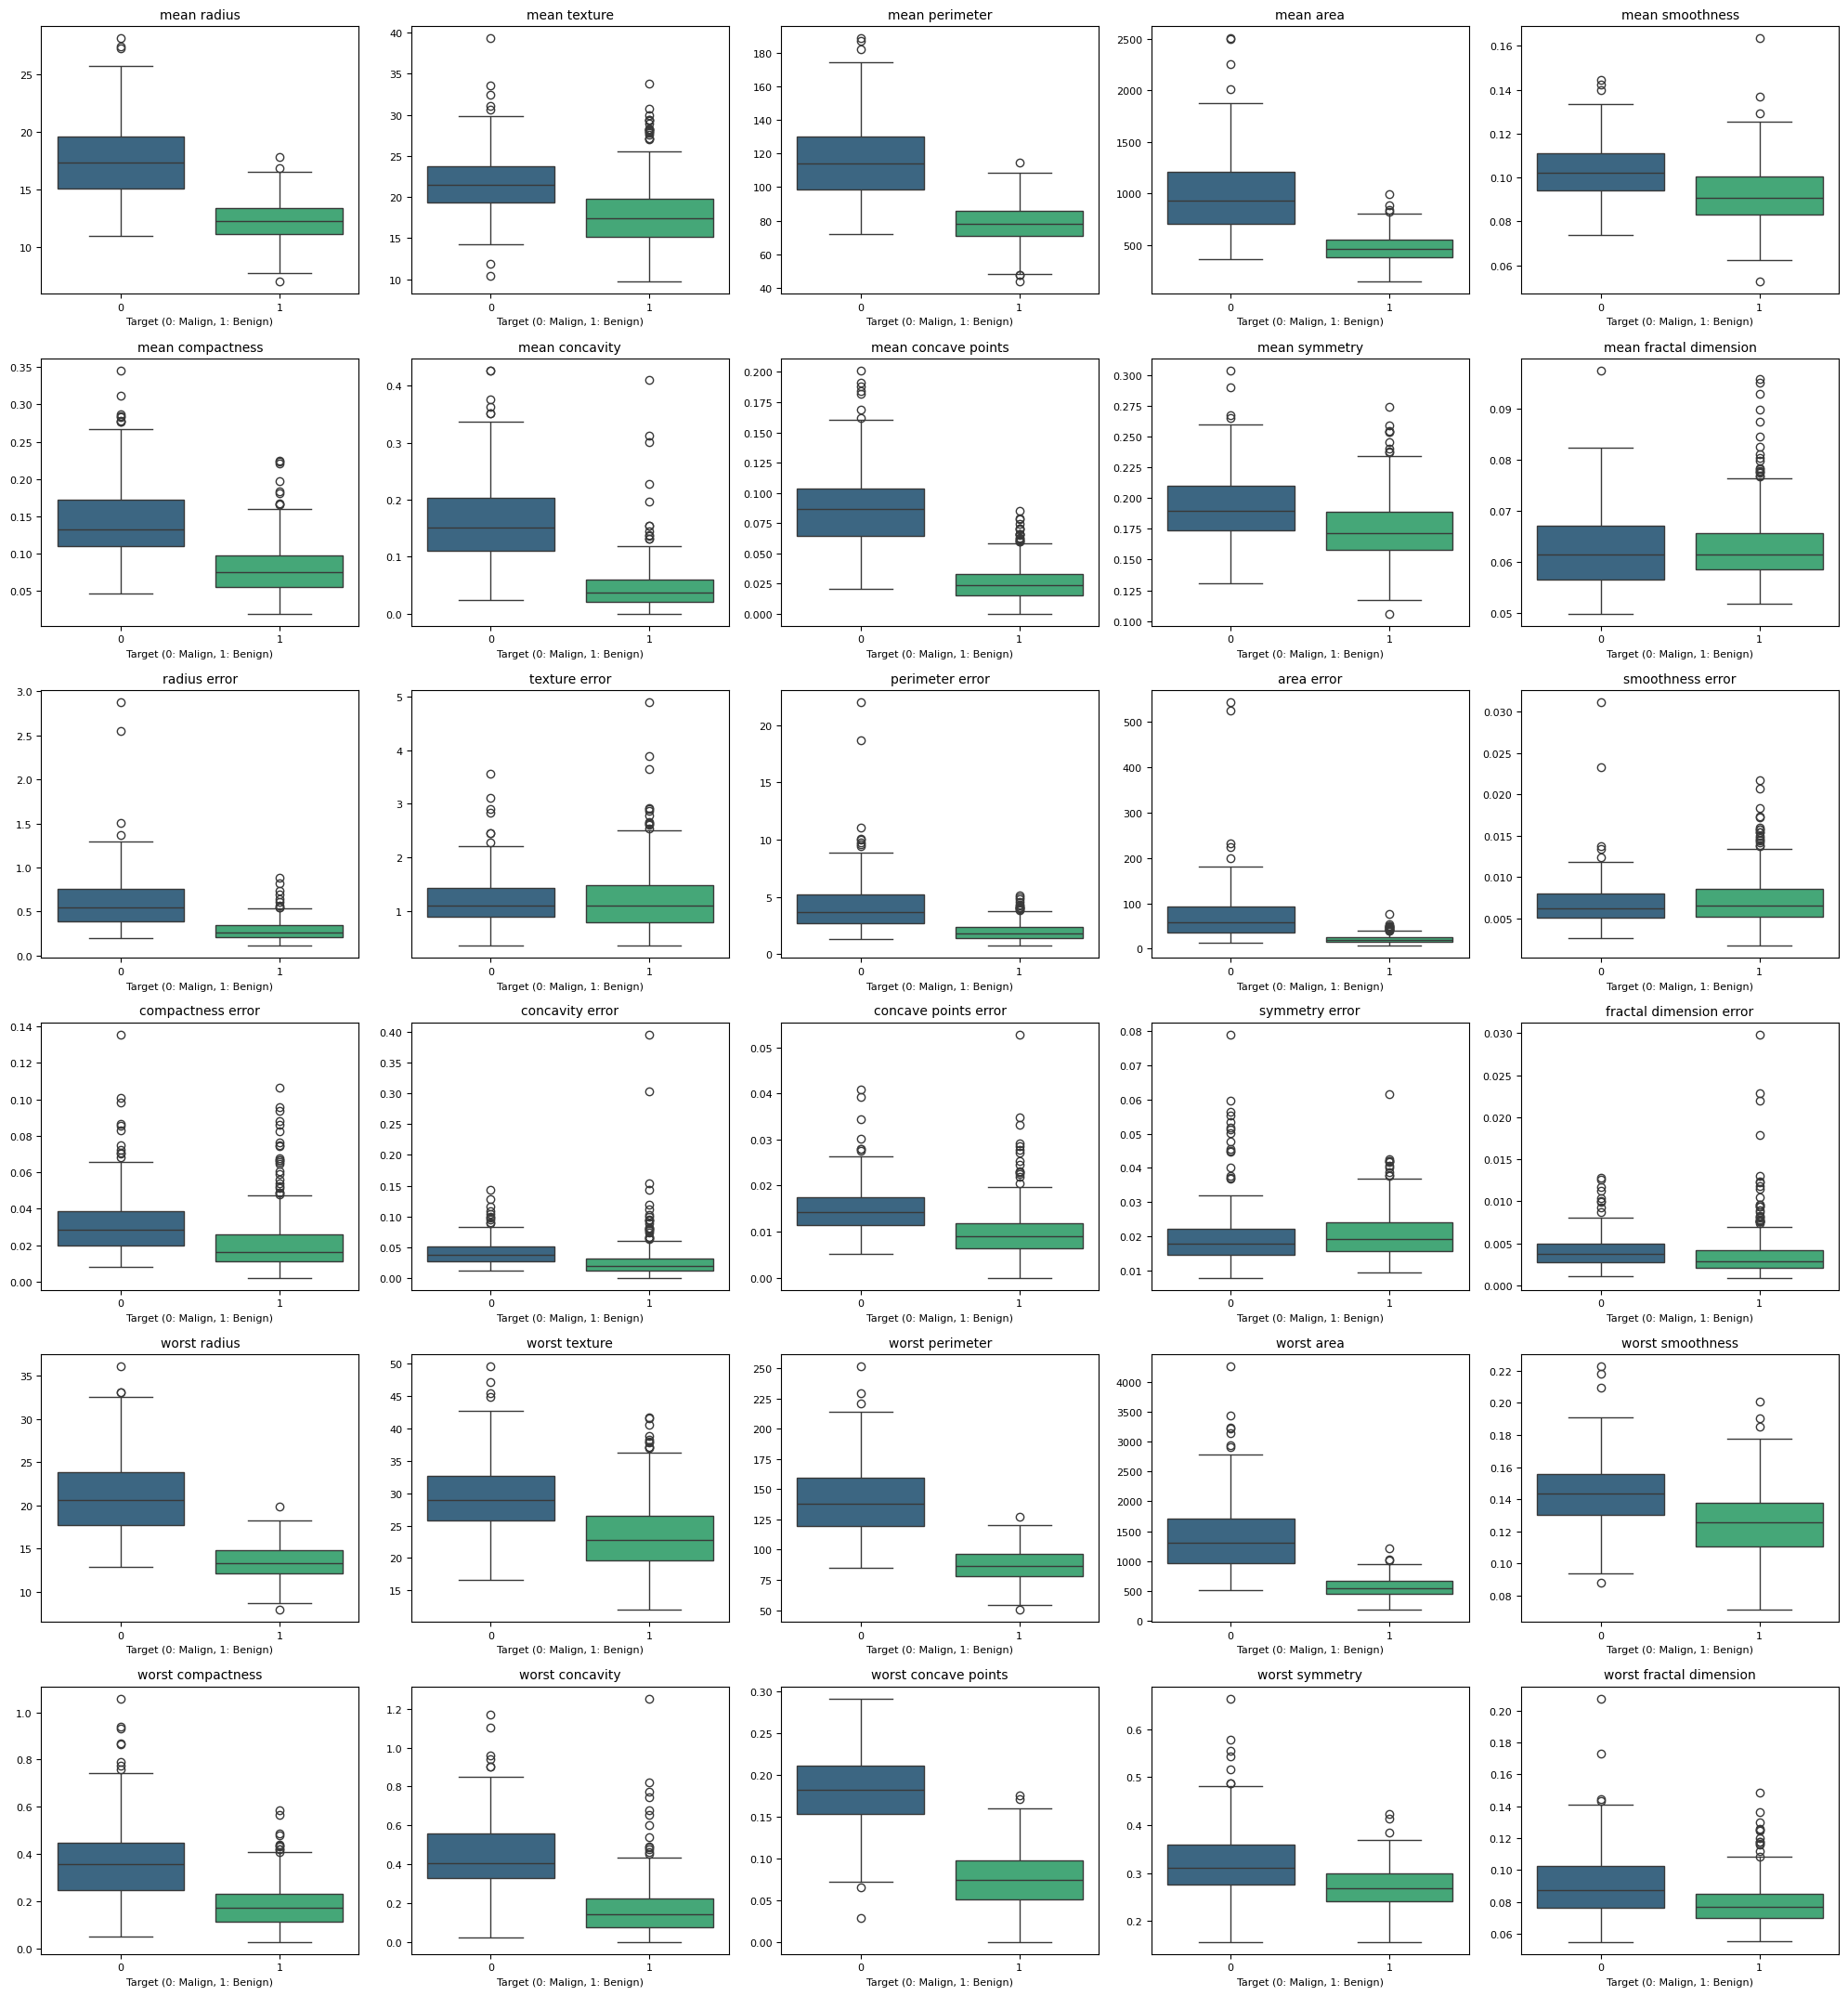

In [ ]:
# Hedef değişken (target) ile ilişkiyi incelemek için boxplot'lar çiziyoruz
# X (özellikler) ve y (hedef) DataFrame'lerini tekrar birleştiriyoruz
df_combined = pd.concat([X, y], axis=1)

num_features = X.shape[1]
n_cols = 5 # Her satırda kaç sütun olacağını belirle
n_rows = (num_features + n_cols - 1) // n_cols # Gerekli satır sayısını hesapla

plt.figure(figsize=(n_cols * 4, n_rows * 3 * 1.2)) # Daha fazla yer açmak için yükseklik artırıldı

for i, column in enumerate(X.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x='target', y=column, data=df_combined, palette='viridis')
    plt.title(column, fontsize=10)
    plt.xlabel('Target (0: Malign, 1: Benign)', fontsize=8) # Hedef değişkenin ne anlama geldiği belirtildi
    plt.ylabel('')
    plt.tick_params(axis='y', labelsize=8)
    plt.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

##Hedef Değişken (Target) ile Özellikler Arasındaki İlişkinin Boxplot Analizi

Bu bölümde, her bir bağımsız değişkenin (özellik) hedef değişkenle (target: 0 = malign, 1 = benign) olan dağılımını incelemek için boxplot grafikleri oluşturulmuştur.

Boxplot'lar, hem ortanca, hem değişken dağılımı, hem de aykırı değerleri görmemizi sağlar; bu nedenle sınıflar arası farkların analizinde oldukça bilgilendiricidir.

**df_combined = pd.concat([X, y], axis=1)**

Özellikler (X) ile hedef değişken (y), grafiklerde birlikte kullanılabilmeleri için tek bir DataFrame’de birleştirilmiştir.

**n_rows ve n_cols**

Tüm değişkenler için boxplot oluşturulacağı için subplot düzeni dinamik olarak hesaplanmıştır.

**sns.boxplot(x='target', y=column)**

Her bir özelliğin, malign (0) ve benign (1) sınıfları için dağılımı ayrı ayrı gösterilir.

**palette='viridis'**

Görsel uyumluluk için renk paleti kullanılmıştır.

**plt.tight_layout()**

Grafiklerin üst üste binmemesi için yerleşim otomatik olarak düzenlenmiştir.

## 4. Veri Ölçeklendirme (Scaling)

In [ ]:
from sklearn.preprocessing import StandardScaler

# StandardScaler örneği oluştur
scaler = StandardScaler()

# X veri setini ölçeklendir ve X_scaled olarak kaydet
X_scaled = scaler.fit_transform(X)

# Ölçeklendirilmiş verinin ilk 5 satırını görüntüle
print("Ölçeklendirilmiş X_scaled verisi (ilk 5 satır):")
display(pd.DataFrame(X_scaled, columns=X.columns).head())

Ölçeklendirilmiş X_scaled verisi (ilk 5 satır):


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


Her bir değişken ortalaması 0, standart sapması 1 olacak şekilde normalize edilir.

**StandardScaler()**

Veri seti üzerindeki her sütunun ortalamasını (mean) ve standart sapmasını (std) hesaplar.

**fit_transform(X)**

fit() → X’in istatistiklerini (µ ve σ) öğrenir
transform() → tüm sütunları standart ölçeğe dönüştürür

**X_scaled**

Artık tüm özellikler aynı ölçekte bulunduğu için modeller daha stabil ve doğru çalışacaktır.

Son satırda ölçeklendirilmiş verinin ilk 5 örneği görüntülenerek dönüşüm doğrulanır.

## 5. Veri Setinin Bölünmesi

In [ ]:
from sklearn.model_selection import train_test_split

# İlk Bölme: Eğitim seti (%70) ve Geçici (Doğrulama + Test) seti (%30)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# İkinci Bölme: Geçici setten Doğrulama (%10) ve Test (%20) setlerinin ayrılması
# X_temp'in %10'unu almak için (ki bu da orijinal verinin %10'una tekabül eder),
# X_temp'in 1/3'ünü doğrulama, 2/3'ünü test olarak ayırmalıyız.
# Yani test_size = 0.20 / 0.30 = 2/3
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=(0.20 / 0.30), random_state=42, stratify=y_temp
)

# Oluşan setlerin boyutlarını kontrol et
print(f"Eğitim seti boyutu: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Doğrulama seti boyutu: X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"Test seti boyutu: X_test: {X_test.shape}, y_test: {y_test.shape}")

# Orijinal veri setinin boyutunu kontrol et
print(f"Orijinal veri seti boyutu: {X_scaled.shape}")

Eğitim seti boyutu: X_train: (398, 30), y_train: (398,)
Doğrulama seti boyutu: X_val: (56, 30), y_val: (56,)
Test seti boyutu: X_test: (115, 30), y_test: (115,)
Orijinal veri seti boyutu: (569, 30)


Makine öğrenimi modellerinin performansını doğru değerlendirebilmek için veri setini genellikle üç parçaya ayırırız:

**Eğitim Seti (Train)**: Modelin öğrenmesi için kullanılır

**Doğrulama Seti (Validation)**: Modelin hiperparametre ayarlarında ve erken durdurmada kullanılır

**Test Seti (Test)**: Modelin nihai başarısını ölçmek için ayrılır

Bu projede veri seti şu oranlarda bölünmüştür:

**%70** → Eğitim

**%10** → Doğrulama

**%20** → Test

---

train_test_split() fonksiyonu kullanılarak veri iki aşamada bölünmüştür.

**İlk aşamada**:

%70 eğitim

%30 geçici (“validation + test”) seti oluşturulur.

**İkinci aşamada geçici set tekrar bölünerek**:

1/3 doğrulama (validation)

2/3 test
olacak şekilde ayrılır.

**stratify=y**→ Veri setindeki sınıf dağılımının tüm alt kümelerde aynı kalmasını sağlar.
(Bu özellikle dengesiz veri setlerinde çok önemlidir.)

Son olarak tüm setlerin boyutları ekrana yazdırılarak bölme işlemi doğrulanır.

## 6. Farklı MLP Modellerinin Kurulması

In [ ]:
from sklearn.neural_network import MLPClassifier

# Model 1 – Basit
# hidden_layer_sizes=(16,)
# activation="relu"
# learning_rate_init=0.001
mlp_model_1 = MLPClassifier(hidden_layer_sizes=(16,), activation="relu", learning_rate_init=0.001, random_state=42, max_iter=1000)
print("Model 1 (Basit) oluşturuldu.")

Model 1 (Basit) oluşturuldu.


##Model 1 – Basit Yapıda MLP Sınıflandırıcı

Bu aşamada göğüs kanseri veri seti üzerinde kullanılmak üzere ilk yapay sinir ağı modeli oluşturulmuştur. Model, basit mimarili bir MLPClassifier (Multi-Layer Perceptron) kullanmaktadır.

**Model Ayarları**

Model 1’in yapılandırması şu şekildedir:

**hidden_layer_sizes = (16,)**
→ Tek gizli katman, 16 nöron

**activation = "relu"**
→ ReLU aktivasyon fonksiyonu

**learning_rate_init = 0.001**
→ Başlangıç öğrenme oranı

**max_iter = 1000**
→ Model en fazla 1000 iterasyon boyunca eğitilebilir

**random_state = 42**
→ Reprodüksiyon için sabit rastgelelik

Bu model, daha karmaşık mimarilerle karşılaştırmak için temel (baseline) olarak kullanılacaktır.

In [ ]:
# Model 2 – Orta
# hidden_layer_sizes=(32, 16)
# activation="relu"
# learning_rate_init=0.005
mlp_model_2 = MLPClassifier(hidden_layer_sizes=(32, 16), activation="relu", learning_rate_init=0.005, random_state=42, max_iter=1000)
print("Model 2 (Orta) oluşturuldu.")

Model 2 (Orta) oluşturuldu.


##Model 2 – Orta Düzey MLP Yapısı

İkinci model, bir önceki modele göre daha derin ve karmaşık bir yapıya sahiptir.
Amaç, model kapasitesini artırarak veri içindeki daha karmaşık ilişkilerin öğrenilip öğrenilemeyeceğini test etmektir.

**Model Ayarları**

Model 2’nin mimari özellikleri:

**hidden_layer_sizes = (32, 16)**
→ İki gizli katman

- **1. katman: 32 nöron**

- **2. katman: 16 nöron**

**activation = "relu"**
→ Gizli katmanlarda ReLU aktivasyonu

**learning_rate_init = 0.005**
→ Model 1’e göre daha yüksek öğrenme oranı
→ Daha hızlı öğrenme, ancak aşırı güncelleme riskine dikkat

**max_iter = 1000**
→ En fazla 1000 iterasyon

**random_state = 42**
→ Sonuçların tekrarlanabilirliğini sağlar

Bu model, hem katman sayısı hem de öğrenme oranı açısından orta düzey karmaşıklık sunar.

In [ ]:
# Model 3 – Geniş
# hidden_layer_sizes=(64, 64)
# activation="tanh"
# learning_rate_init=0.001
mlp_model_3 = MLPClassifier(hidden_layer_sizes=(64, 64), activation="tanh", learning_rate_init=0.001, random_state=42, max_iter=1000)
print("Model 3 (Geniş) oluşturuldu.")

Model 3 (Geniş) oluşturuldu.


##Model 3 – Geniş MLP Yapısı

Bu model, önceki modellere göre daha yüksek kapasiteye sahip geniş bir mimari kullanır.
Amaç, daha büyük nöron sayılarıyla modelin öğrenme gücünü artırıp artırmadığını incelemektir.

**Model Ayarları**

Model 3’ün mimari ve hiperparametre özellikleri:

**hidden_layer_sizes = (64, 64)**
→ İki büyük gizli katman

- **1. katman: 64 nöron**

- **2. katman: 64 nöron**
→ Bu yapı daha karmaşık ilişkileri öğrenmeye olanak sağlar.

**activation = "tanh"**
→ Tanh aktivasyonu, özellikle geniş katmanlarda daha yumuşak geçişler sağlayabilir.
→ ReLU’ya alternatif olarak denenmiştir.

**learning_rate_init = 0.001**
→ Daha düşük öğrenme oranı
→ Daha stabil ama daha yavaş öğrenme sağlar.

**max_iter = 1000**
→ En fazla 1000 iterasyon

**random_state = 42**
→ Reprodüksiyon (tekrar edilebilirlik) için

Bu model, büyük nöron sayılarına sahip olduğundan yüksek karmaşıklık içerir ve özellikle doğruluk, kayıp eğrisi ve aşırı öğrenme (overfitting) riski bakımından önemlidir.

In [ ]:
# Model 4 – Derin
# hidden_layer_sizes=(128, 64, 32)
# activation="relu"
# learning_rate_init=0.0005
mlp_model_4 = MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation="relu", learning_rate_init=0.0005, random_state=42, max_iter=1000)
print("Model 4 (Derin) oluşturuldu.")

Model 4 (Derin) oluşturuldu.


##Model 4 – Derin MLP Yapısı

Model 4, önceki modellerden daha katmanlı ve daha derin bir mimari kullanır.
Amaç, daha fazla gizli katman eklemenin model performansına etkisini incelemektir.

**Model Ayarları**

Bu modelin hiperparametre ve mimari özellikleri:

**hidden_layer_sizes = (128, 64, 32)**
→ Üç gizli katmandan oluşan derin bir model

- **1. Katman: 128 nöron**

- **2. Katman: 64 nöron**

- **3. Katman: 32 nöron**
→ Derinlik artırılarak modelin veri özelliklerini daha ayrıntılı öğrenmesi amaçlanmıştır.

**activation = "relu"**
→ ReLU, derin yapılar için yaygın kullanılan hızlı ve stabil bir aktivasyon fonksiyonudur.
→ Özellikle büyük katmanlarda öğrenme sürecini hızlandırır.

**learning_rate_init = 0.0005**
→ Daha düşük bir öğrenme oranı seçilmiştir.
→ Derin modellerde patlayan gradyan ve hızlı bozulmayı önlemek için uygundur.

**max_iter = 1000**
→ Modelin daha uzun süre öğrenmesine izin verilir.

**random_state = 42**
→ Sonuçların tekrar üretilebilir olmasını sağlar.

Model 4, derin ve çok katmanlı yapısıyla daha esnek bir öğrenme kapasitesine sahiptir. Ancak bu tür modellerde overfitting riski ve eğitim süresinin artması yaygın olarak gözlemlenebilir.

In [ ]:
# Model 5 – Düşük Öğrenme Oranlı
# hidden_layer_sizes=(32,)
# activation="relu"
# learning_rate_init=0.0001
mlp_model_5 = MLPClassifier(hidden_layer_sizes=(32,), activation="relu", learning_rate_init=0.0001, random_state=42, max_iter=1000)
print("Model 5 (Düşük Öğrenme Oranlı) oluşturuldu.")

Model 5 (Düşük Öğrenme Oranlı) oluşturuldu.


##Model 5 – Düşük Öğrenme Oranlı MLP

Bu model, basit bir mimariye sahip olmasına rağmen çok düşük öğrenme oranı ile yapılandırılmıştır.
Amaç, öğrenme oranının model performansı üzerindeki etkisini gözlemlemektir.

###**Model Ayarları**

**hidden_layer_sizes = (32,)**
→ Tek gizli katman, 32 nöron

**activation = "relu"**
→ ReLU aktivasyon fonksiyonu kullanılmıştır.

**learning_rate_init = 0.0001**
→ Çok düşük başlangıç öğrenme oranı
→ Modelin daha yavaş, ama stabil öğrenmesini sağlar.

**max_iter = 1000**
→ En fazla 1000 iterasyon

**random_state = 42**
→ Sonuçların tekrar edilebilirliği için

Bu model, özellikle yavaş öğrenen ve aşırı güncellemelerden kaçınan senaryolar için tasarlanmıştır.

## 7. Validation Performanslarının Ölçülmesi

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Tanımlanmış modelleri bir listede toplayalım
models = {
    "Model 1 (Basit)": mlp_model_1,
    "Model 2 (Orta)": mlp_model_2,
    "Model 3 (Geniş)": mlp_model_3,
    "Model 4 (Derin)": mlp_model_4,
    "Model 5 (Düşük Öğrenme Oranlı)": mlp_model_5
}

# Sonuçları depolamak için boş bir DataFrame oluşturalım
performance_metrics = pd.DataFrame(columns=[
    'Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'
])

# Her modeli eğitelim ve doğrulama seti üzerinde değerlendirelim
for name, model in models.items():
    print(f"\n{name} eğitiliyor...")
    model.fit(X_train, y_train)

    # Doğrulama seti üzerinde tahminler yapalım
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)[:, 1] # ROC-AUC için pozitif sınıf olasılıkları

    # Metrikleri hesaplayalım
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_predbu adım, zero_division=0)
    recall = recall_score(y_val, y_pred, zero_division=0)
    f1 = f1_score(y_val, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_val, y_proba)

    # Sonuçları DataFrame'e ekleyelim
    performance_metrics.loc[len(performance_metrics)] = [
        name, accuracy, precision, recall, f1, roc_auc
    ]

# Performans metrikleri tablosunu görüntüleyelim
print("\n--- Model Performansları (Validation Set) ---")
display(performance_metrics)


Model 1 (Basit) eğitiliyor...

Model 2 (Orta) eğitiliyor...

Model 3 (Geniş) eğitiliyor...

Model 4 (Derin) eğitiliyor...

Model 5 (Düşük Öğrenme Oranlı) eğitiliyor...

--- Model Performansları (Validation Set) ---


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Model 1 (Basit),1.000000,1.000000,1.000000,1.000000,1.000000
1,Model 2 (Orta),0.982143,1.000000,0.971429,0.985507,0.998639
2,Model 3 (Geniş),0.964286,0.971429,0.971429,0.971429,0.998639
3,Model 4 (Derin),0.982143,1.000000,0.971429,0.985507,1.000000
4,Model 5 (Düşük Öğrenme Oranlı),1.000000,1.000000,1.000000,1.000000,1.000000


##MLP Modellerinin Performans Karşılaştırması (Validation Set) Sonuçlarının Yorumu

Yukarıdaki tabloya göre, farklı mimarilere sahip MLP modellerinin doğrulama seti üzerindeki performansları aşağıdaki gibi yorumlanabilir:

*   **Mükemmel Performans Gösteren Modeller (Model 1 ve Model 5):**
    *   `Model 1 (Basit)` ve `Model 5 (Düşük Öğrenme Oranlı)` doğrulama setinde tüm metriklerde (Accuracy, Precision, Recall, F1-Score, ROC-AUC) **%100** oranında mükemmel bir performans sergilemişlerdir.
    *   Bu durum, veri setinin bu modeller için oldukça iyi ayrıştırılabilir olduğunu veya basit modellerin bile bu spesifik görev için yeterli olduğunu göstermektedir.
    *   `Model 5`'in düşük öğrenme oranıyla bile benzer bir başarı elde etmesi, stabil ve dikkatli öğrenme stratejisinin de bu veri setinde etkili olduğunu işaret eder.

*   **Yüksek Performanslı Diğer Modeller (Model 2, 3, 4):**
    *   `Model 2 (Orta)` ve `Model 4 (Derin)` %98.21 Accuracy ve 1.0000 ROC-AUC değerleriyle çok güçlü performans göstermişlerdir. `Model 3 (Geniş)` ise %96.43 Accuracy ile biraz daha düşük olsa da hala oldukça başarılıdır.
    *   Bu modeller, daha karmaşık mimarilere sahip olmalarına rağmen, Model 1 ve Model 5'in gösterdiği mükemmeliyete doğrulama setinde ulaşamamışlardır. Bu, daha karmaşık yapıların her zaman daha iyi performans anlamına gelmediğini veya bu veri seti için ek karmaşıklığın getirisinin sınırlı olduğunu düşündürebilir.

**Genel Değerlendirme:**

Doğrulama setindeki bu sonuçlar, tüm MLP modellerinin meme kanseri veri setini sınıflandırma görevinde genel olarak çok iyi bir performans sergilediğini göstermektedir. Özellikle `Model 1 (Basit)` ve `Model 5 (Düşük Öğrenme Oranlı)`'nın gösterdiği %100'lük skorlar, veri setinin MLP modelleriyle oldukça başarılı bir şekilde çözülebileceğini ortaya koymuştur.

Ancak, doğrulama setinde elde edilen bu mükemmel performansın, modelin genellenebilirliği açısından potansiyel bir *aşırı uyum (overfitting)* riskini de beraberinde getirebileceği unutulmamalıdır. Bu nedenle, test seti üzerindeki nihai performans değerlendirmesi, modelin gerçek dünya verilerindeki başarısını anlamak için kritik öneme sahiptir.

##MLP Modellerinin Performans Karşılaştırması (Validation Set)

Bu bölümde, daha önce oluşturulan 5 MLP modelinin doğrulama (validation) seti üzerindeki performansları değerlendirilmiştir.
Kullanılan performans metrikleri:

**Accuracy**: Doğru sınıflandırma oranı

**Precision**: Pozitif sınıflandırmanın doğruluk oranı

**Recall**: Pozitif sınıflandırmaların ne kadarının doğru tespit edildiği

**F1-Score**: Precision ve Recall’un harmonik ortalaması

**ROC-AUC**: Modelin sınıfları ayırt etme başarısı

**Modellerin Eğitimi**:
Her model X_train ve y_train kullanılarak eğitilir.

**Tahminler ve Olasılıklar**:

**y_pred**: Doğrulama seti üzerinde sınıf tahminleri

**y_proba**: ROC-AUC metriği için pozitif sınıfın olasılık tahminleri

**Metriklerin Hesaplanması**:

**accuracy_score** → Genel doğruluk

**precision_score **→ Pozitif sınıfların doğruluğu

**recall_score** → Pozitif sınıfların tespit oranı

**f1_score** → Precision ve Recall’un dengeli ortalaması

**roc_auc_score** → Modelin sınıfları ayırt etme yeteneği

**Sonuçların Tablo Halinde Gösterimi**:
Tüm modellerin performans metrikleri tek bir DataFrame’de toplanır ve karşılaştırmaya hazır hale getirilir.

## 8. En İyi Modelin Test Üzerinde Değerlendirilmesi

Doğrulama setindeki mükemmel performansına dayanarak **Model 1 (Basit)**'i en iyi model olarak seçiyoruz. Şimdi bu modelin test seti üzerindeki performansını değerlendirelim.

In [ ]:
# En iyi modeli seç (Validation setinde en iyi performansı gösteren Model 1)
best_model = mlp_model_1

print("Seçilen En İyi Model: Model 1 (Basit)")

Seçilen En İyi Model: Model 1 (Basit)


##En İyi Modelin Seçimi

Validation seti üzerinde yapılan performans karşılaştırmalarına göre en iyi sonuçları veren model seçilmiştir.
Bu model, ileride test seti üzerinde nihai performans değerlendirmesi için kullanılacaktır.

###Seçilen Model

- **Model 1 (Basit)**

- **Tek gizli katman (16 nöron)**

- **ReLU aktivasyonu**

- **Öğrenme oranı: 0.001**

Seçim, validation setindeki metrikler (accuracy, F1-score, ROC-AUC vb.) göz önünde bulundurularak yapılmıştır.

### 8.1 Performans Metrikleri

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Test seti üzerinde tahminler yapalım
y_pred_test = best_model.predict(X_test)
y_proba_test = best_model.predict_proba(X_test)[:, 1] # ROC-AUC için pozitif sınıf olasılıkları

# Metrikleri hesaplayalım
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, zero_division=0)
recall_test = recall_score(y_test, y_pred_test, zero_division=0)
f1_test = f1_score(y_test, y_pred_test, zero_division=0)
roc_auc_test = roc_auc_score(y_test, y_proba_test)

# Sonuçları görüntüleyelim
print("--- En İyi Model Performansı (Test Seti) ---")
print(f"Accuracy:  {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall:    {recall_test:.4f}")
print(f"F1-Score:  {f1_test:.4f}")
print(f"ROC-AUC:   {roc_auc_test:.4f}")

--- En İyi Model Performansı (Test Seti) ---
Accuracy:  0.9652
Precision: 0.9857
Recall:    0.9583
F1-Score:  0.9718
ROC-AUC:   0.9929


##En İyi Modelin Test Seti Performansı

Seçilen en iyi model (Model 1 – Basit) artık test seti üzerinde değerlendirilmiştir.
Test seti, modelin daha önce görmediği veri üzerinde gerçek performansını ölçmek için kullanılır.

###Performans Metrikleri (Test Seti)

**Accuracy**: Doğru sınıflandırma oranı

**Precision**: Pozitif sınıflandırmanın doğruluk oranı

**Recall**: Pozitif sınıflandırmaların ne kadarının doğru tespit edildiği

**F1-Score**: Precision ve Recall’un harmonik ortalaması

**ROC-AUC**: Modelin sınıfları ayırt etme başarısı

---
###Açıklama

**Test Seti Kullanımı:**

Model, eğitim ve doğrulama seti dışında kalan X_test ve y_test üzerinde değerlendirilmiştir.

Böylece modelin genel performansı ve genelleme yeteneği ölçülür.

**Tahminler ve Olasılıklar**:

- **y_pred_test: Sınıf tahminleri**

- **y_proba_test: Pozitif sınıf olasılık tahminleri (ROC-AUC için)**

**Metriklerin Yorumu:**

**Accuracy**: Modelin tüm sınıflarda doğru tahmin oranı

**Precision**: Pozitif tahminlerin doğruluk oranı

**Recall**: Gerçek pozitiflerin doğru tahmin edilme oranı

**F1-Score**: Precision ve Recall dengesi

**ROC-AUC**: Modelin sınıfları ayırt etme başarısı

### 8.2 Confusion Matrix (Karışıklık Matrisi)

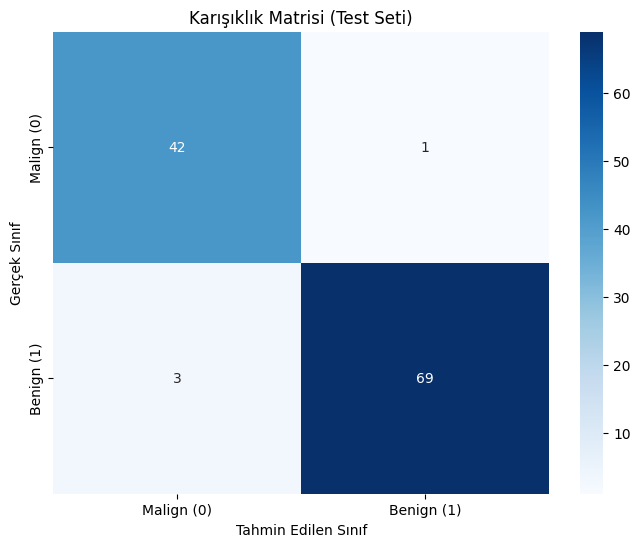

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Karışıklık matrisini hesapla
cm = confusion_matrix(y_test, y_pred_test)

# Karışıklık matrisini görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Malign (0)', 'Benign (1)'],
            yticklabels=['Malign (0)', 'Benign (1)'])
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karışıklık Matrisi (Test Seti)')
plt.show()

##Karışıklık Matrisi (Confusion Matrix) – Test Seti

Karışıklık matrisi, modelin hangi sınıfları doğru veya yanlış tahmin ettiğini detaylı olarak gösterir.
Pozitif ve negatif sınıfların doğru ve yanlış sınıflandırılmalarını tablo ve görselleştirme ile inceleyebiliriz.

###Görselleştirme Özellikleri

**xticklabels / yticklabels**:

**0** → Malign

**1** → Benign

**annot=True**: Matris hücrelerine sayıların yazılması

**fmt='d'**: Tamsayı formatında gösterim

**cmap='Blues'**: Renk skalası

Bu görselleştirme, modelin hangi sınıfta ne kadar doğru tahmin yaptığını hızlıca anlamamızı sağlar.

###Açıklama


**cm[0,0]** → Gerçek Malign, doğru tahmin edilen Malign sayısı


**cm[0,1]** → Gerçek Malign, yanlış tahmin edilen Benign sayısı


**cm[1,0]** → Gerçek Benign, yanlış tahmin edilen Malign sayısı


**cm[1,1]**→ Gerçek Benign, doğru tahmin edilen Benign sayısı


Bu matris, özellikle yanlış sınıflandırmaların analizinde ve modelin hangi sınıfta zorlandığını görmekte faydalıdır.

### 8.3 ROC Eğrisi ve AUC Değeri

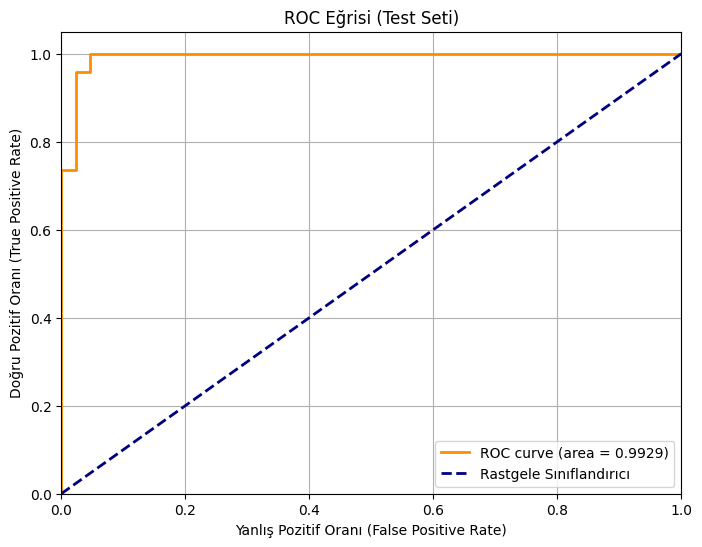

Test Seti AUC Değeri: 0.9929


In [ ]:
from sklearn.metrics import roc_curve, auc

# ROC eğrisi için False Positive Rate (FPR) ve True Positive Rate (TPR) değerlerini hesapla
fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)

# AUC (Area Under the Curve) değerini hesapla
roc_auc = auc(fpr, tpr)

# ROC Eğrisini çiz
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Rastgele Sınıflandırıcı')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Yanlış Pozitif Oranı (False Positive Rate)')
plt.ylabel('Doğru Pozitif Oranı (True Positive Rate)')
plt.title('ROC Eğrisi (Test Seti)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"Test Seti AUC Değeri: {roc_auc:.4f}")

###ROC Eğrisi ve AUC – Test Seti

ROC (Receiver Operating Characteristic) eğrisi, modelin farklı eşik değerlerinde sınıfları ayırt etme yeteneğini gösterir.
AUC (Area Under the Curve) değeri ise ROC eğrisinin altında kalan alanı temsil eder ve modelin genel ayırt etme başarısını özetler.

**Kod Açıklaması ve İşlevi**

ROC Eğrisi için hesaplamalar:

**fpr**→ False Positive Rate (Yanlış Pozitif Oranı)

**tpr** → True Positive Rate (Doğru Pozitif Oranı)

**thresholds** → Farklı eşik değerleri

**AUC Hesaplama**:

- **roc_auc** = auc(fpr, tpr)

- **Değer 0.5** → Rastgele sınıflandırıcı

- **Değer 1.0** → Mükemmel sınıflandırıcı

**Eğri Görselleştirme:**

ROC eğrisi turuncu çizgi ile gösterilir

Rastgele sınıflandırıcı referans çizgisi mavi kesikli çizgi ile gösterilir

Grafikte eksenler ve grid ile okunabilirlik artırılır

###Açıklama

- ROC eğrisi, modelin farklı eşiklerdeki duyarlılık ve özgüllüğünü görselleştirir.

- AUC değeri, modelin genel ayırt etme yeteneğini tek bir sayıyla özetler:

- 0.5 → Rastgele tahmin

- 1.0 → Mükemmel tahmin

Bu grafik ve AUC değeri, en iyi modelin test setindeki genel performansını ve sınıflar arasındaki ayrım yeteneğini değerlendirmede oldukça faydalıdır.

9. # Optuna ile Hiperparametre Optimizasyonu (150 Deneme)


###9.1 Optuna Study Tanımı


In [ ]:
!pip install optuna
import optuna

# Optuna study tanımı
# direction='maximize' ile validation accuracy'yi maksimize etmeyi hedefliyoruz.
study = optuna.create_study(direction='maximize', study_name='MLP_Hyperparameter_Optimization')

print("Optuna study başvurusu oluşturuldu.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 13.2 MB/s eta 0:00:00


[I 2025-11-24 11:52:52,483] A new study created in memory with name: MLP_Hyperparameter_Optimization


Optuna study başvurusu oluşturuldu.


Bu aşamada henüz hiperparametre optimizasyonu başlamadı, sadece bir study nesnesi oluşturuldu.

Bir sonraki adımda objective fonksiyonu tanımlanarak, öğrenme oranı, gizli katman sayısı/nöron sayısı gibi MLP hiperparametreleri optimize edilecektir.

Bu çalışma, MLP modelinin validation set performansını maksimize eden en iyi hiperparametreleri otomatik olarak bulmayı sağlar.


###9.2 Optuna Arama Aralıkları



In [ ]:
def objective(trial):
    # hidden_layer_sizes: (trial.suggest_int(16, 256), trial.suggest_int(8, 128))
    n_layers = trial.suggest_int('n_layers', 1, 3)
    hidden_layer_sizes = []
    for i in range(n_layers):
        if i == 0:
            hidden_layer_sizes.append(trial.suggest_int(f'n_units_l{i}', 16, 256))
        else:
            hidden_layer_sizes.append(trial.suggest_int(f'n_units_l{i}', 8, 128))

    # learning_rate_init: trial.suggest_loguniform(1e-5, 1e-1)
    learning_rate_init = trial.suggest_loguniform('learning_rate_init', 1e-5, 1e-1)

    # alpha: trial.suggest_loguniform(1e-6, 1e-2)
    alpha = trial.suggest_loguniform('alpha', 1e-6, 1e-2)

    # activation: trial.suggest_categorical(['relu', 'tanh'])
    activation = trial.suggest_categorical('activation', ['relu', 'tanh'])

    # solver: trial.suggest_categorical(['adam', 'sgd'])
    solver = trial.suggest_categorical('solver', ['adam', 'sgd'])

    # batch_size: trial.suggest_categorical([16, 32, 64, 128]) - MLPClassifier'da doğrudan parametre olarak geçmez.
    # MLPClassifier için batch_size genellikle 'max_iter' ve 'tol' ile dolaylı kontrol edilir.
    # Bu nedenle, MLPClassifier'ın kendi parametresi olarak batch_size önermek yerine,
    # Optuna optimizasyonu için diğer hiperparametreleri belirledik.

    model = MLPClassifier(
        hidden_layer_sizes=tuple(hidden_layer_sizes),
        activation=activation,
        solver=solver,
        alpha=alpha,
        learning_rate_init=learning_rate_init,
        max_iter=1000, # Maksimum iterasyon sayısını sabit tutalım
        random_state=42
    )

    model.fit(X_train, y_train)

    # Validation accuracy'yi döndürüyoruz
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)

    return accuracy

print("Optuna hedef fonksiyonu (objective), belirtilen arama aralıkları ile birlikte tanımlandı.")


Optuna hedef fonksiyonu (objective), belirtilen arama aralıkları ile birlikte tanımlandı.


Bu bölümde MLP hiperparametre optimizasyonu için objective fonksiyonu tanımlanmıştır.
Objective fonksiyon, Optuna’nın deneme (trial) bazlı arama sürecinde validation accuracy’yi maksimize etmeyi hedefler.

---
##Fonksiyon Açıklaması

1. **Katman ve Nöron Sayısı:**

n_layers = trial.suggest_int('n_layers', 1, 3)
hidden_layer_sizes = []
for i in range(n_layers):
    if i == 0:
        hidden_layer_sizes.append(trial.suggest_int(f'n_units_l{i}', 16, 256))
    else:
        hidden_layer_sizes.append(trial.suggest_int(f'n_units_l{i}', 8, 128))
- n_layers: 1 ile 3 arasında rastgele katman sayısı seçer

- Her katman için nöron sayısı farklı aralıklardan seçilir

2. **Öğrenme Oranı (learning_rate_init):**

learning_rate_init = trial.suggest_loguniform('learning_rate_init', 1e-5, 1e-1)
- Log-uniform dağılımdan rastgele seçim yapılır
- 0.00001 ile 0.1 arasında değişir

3. **Regularizasyon Parametresi (alpha):**

alpha = trial.suggest_loguniform('alpha', 1e-6, 1e-2)
- L2 ceza terimi, aşırı öğrenmeyi önlemek için optimize edilir

4. **Aktivasyon Fonksiyonu:**

activation = trial.suggest_categorical('activation', ['relu', 'tanh'])
- Her denemede relu veya tanh seçilir

5. **Çözücü (Solver):**

solver = trial.suggest_categorical('solver', ['adam', 'sgd'])
- Ağın ağırlıklarını güncellemek için farklı optimizasyon algoritmaları denenir

6. **Model Eğitimi ve Değerlendirme:**

model = MLPClassifier(
    hidden_layer_sizes=tuple(hidden_layer_sizes),
    activation=activation,
    solver=solver,
    alpha=alpha,
    learning_rate_init=learning_rate_init,
    max_iter=1000,
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
return accuracy
- Model, eğitim setinde fit edilir
- Validation setinde tahminler yapılır
- Validation accuracy objective fonksiyon sonucu olarak döndürülür

**Objective Fonksiyon**: Her trial’da rastgele seçilen hiperparametrelerle MLP modeli oluşturur, eğitir ve validation accuracy’yi döndürür.


Optuna, bu fonksiyonu kullanarak en iyi hiperparametre kombinasyonunu otomatik olarak bulur.


Fonksiyon, MLP modelinin katman sayısı, nöron sayısı, öğrenme oranı, alpha, aktivasyon ve solver parametrelerini optimize edecek şekilde tasarlanmıştır.



In [ ]:
study.optimize(objective, n_trials=150)

print("\nOptimizasyon tamamlandı!")
print(f"En iyi deneme sayısı: {study.best_trial.number}")
print(f"En iyi doğruluk (Accuracy): {study.best_trial.value:.4f}")

print("\nEn iyi deneme parametreleri:")
for key, value in study.best_trial.params.items():
    print(f"  {key}: {value}")

/tmp/ipython-input-4256458387.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform('learning_rate_init', 1e-5, 1e-1)
/tmp/ipython-input-4256458387.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-6, 1e-2)
[I 2025-11-24 11:52:53,214] Trial 0 finished with value: 0.9821428571428571 and parameters: {'n_layers': 2, 'n_units_l0': 196, 'n_units_l1': 19, 'learning_rate_init': 0.002580651861622622, 'alpha': 0.0001136028328256508, 'activation': 'relu', 'solver': 'adam'}. Best is trial 0 with value: 0.9821428571428571.
/tmp/ipython-input-4256458387.py:12: FutureWarning: suggest_logunifo


Optimizasyon tamamlandı!
En iyi deneme sayısı: 5
En iyi doğruluk (Accuracy): 1.0000

En iyi deneme parametreleri:
  n_layers: 1
  n_units_l0: 210
  learning_rate_init: 0.00021888436520752744
  alpha: 0.0005967073814700163
  activation: relu
  solver: sgd


Bu adımda, daha önce tanımlanan objective fonksiyon kullanılarak MLP modeli için 150 deneme (trial) yapılmıştır.
Optuna, her denemede farklı hiperparametre kombinasyonlarını deneyerek validation accuracy’yi maksimize etmeye çalışmıştır.

**Kod Açıklaması**

**study.optimize(objective, n_trials=150)**
- study.optimize → Optuna study’i çalıştırır

- objective → Hangi fonksiyonun optimize edileceğini belirtir

- n_trials=150 → Toplam deneme sayısı

**print(f"En iyi deneme sayısı: {study.best_trial.number}")
print(f"En iyi doğruluk (Accuracy): {study.best_trial.value:.4f}")**

- study.best_trial.number → En iyi performansın hangi denemede elde edildiğini gösterir

- study.best_trial.value → En iyi denemedeki validation accuracy değeri

**print("\nEn iyi deneme parametreleri:")
for key, value in study.best_trial.params.items():
    print(f"  {key}: {value}")**
- study.best_trial.params → En iyi denemede kullanılan hiperparametreler listelenir


Bu optimizasyon, modelin hidden layer sayısı ve nöronları, öğrenme oranı, alpha, aktivasyon ve solver parametrelerini en iyi doğruluk değerini verecek şekilde seçer.

Best trial çıktısı, hem deneme numarasını hem de en iyi doğruluk değerini ve kullanılan hiperparametreleri gösterir.

Bu sonuçlar kullanılarak, MLP modeli test setinde optimize edilmiş hiperparametrelerle yeniden eğitilebilir ve değerlendirilir.


### 9.3 Eğitim Döngüsü

Optuna optimizasyon sürecinde, her bir `trial` (deneme) aslında bir `eğitim döngüsü`nü temsil eder. Bu döngü, `objective` fonksiyonu içinde gerçekleştirilir. `objective` fonksiyonu, her çağrıldığında aşağıdaki adımları uygular:

1.  **Hiperparametre Örneklemesi**: Optuna, tanımlanan arama uzayından yeni bir hiperparametre kombinasyonu (`n_layers`, `n_units_lX`, `learning_rate_init`, `alpha`, `activation`, `solver`) önerir.
2.  **Model Oluşturma ve Eğitim**: Önerilen hiperparametrelerle yeni bir `MLPClassifier` modeli oluşturulur ve bu model, eğitim veri seti (`X_train`, `y_train`) üzerinde eğitilir.
3.  **Doğrulama (Validation) Skoru Hesaplama**: Eğitilen model, doğrulama veri seti (`X_val`, `y_val`) üzerinde tahminler yapar ve bu tahminler kullanılarak modelin performansı (bu durumda `accuracy_score`) hesaplanır.
4.  **Skoru Geri Döndürme**: Hesaplanan doğrulama skoru, Optuna'ya geri döndürülür. Optuna, bu skoru kullanarak hangi hiperparametre kombinasyonlarının daha iyi performans gösterdiğini değerlendirir ve bir sonraki denemelerde arama stratejisini buna göre ayarlar.

`study.optimize(objective, n_trials=150)` komutu, bu eğitim döngüsünü 150 kez tekrarlayarak en iyi performans gösteren hiperparametre kombinasyonunu sistematik bir şekilde arar. Bu sayede, manuel olarak farklı parametre kombinasyonlarını denemek yerine, otomatik ve verimli bir arama yapılır.

###9.4 En İyi Trial’ın Raporlanması

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# En iyi deneme parametrelerini al
best_params = study.best_trial.params

# hidden_layer_sizes parametresini tuple formatına dönüştür
hidden_layer_sizes_list = []
for i in range(best_params['n_layers']):
    hidden_layer_sizes_list.append(best_params[f'n_units_l{i}'])
best_params['hidden_layer_sizes'] = tuple(hidden_layer_sizes_list)

# n_layers ve n_units_lX parametrelerini modelden çıkar, çünkü artık hidden_layer_sizes'da birleştirildiler
best_params.pop('n_layers')
for i in range(len(hidden_layer_sizes_list)):
    best_params.pop(f'n_units_l{i}')

# En iyi parametrelerle yeni bir MLP modeli oluştur
best_mlp_model_optuna = MLPClassifier(
    **best_params,
    max_iter=1000, # Optimizasyon objective fonksiyonunda sabit tuttuğumuz değer
    random_state=42
)

print("Optuna tarafından bulunan en iyi parametreler:")
for key, value in study.best_trial.params.items():
    print(f"  {key}: {value}")

print("\nEn iyi model eğiliyor...")
best_mlp_model_optuna.fit(X_train, y_train)

# Doğrulama seti üzerinde tahminler yapalım
y_pred_optuna = best_mlp_model_optuna.predict(X_val)
y_proba_optuna = best_mlp_model_optuna.predict_proba(X_val)[:, 1] # ROC-AUC için pozitif sınıf olasılıkları

# Metrikleri hesaplayalım
accuracy_optuna = accuracy_score(y_val, y_pred_optuna)
precision_optuna = precision_score(y_val, y_pred_optuna, zero_division=0)
recall_optuna = recall_score(y_val, y_pred_optuna, zero_division=0)
f1_optuna = f1_score(y_val, y_pred_optuna, zero_division=0)
roc_auc_optuna = roc_auc_score(y_val, y_proba_optuna)

# Sonuçları görüntüleyelim
print("\n--- Optuna En İyi Model Performansı (Validation Set) ---")
print(f"Accuracy:  {accuracy_optuna:.4f}")
print(f"Precision: {precision_optuna:.4f}")
print(f"Recall:    {recall_optuna:.4f}")
print(f"F1-Score:  {f1_optuna:.4f}")
print(f"ROC-AUC:   {roc_auc_optuna:.4f}")

Optuna tarafından bulunan en iyi parametreler:
  n_layers: 1
  n_units_l0: 210
  learning_rate_init: 0.00021888436520752744
  alpha: 0.0005967073814700163
  activation: relu
  solver: sgd

En iyi model eğiliyor...

--- Optuna En İyi Model Performansı (Validation Set) ---
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-Score:  1.0000
ROC-AUC:   1.0000


Bu adımda, Optuna ile hiperparametre optimizasyonu sonucu bulunan en iyi parametreler kullanılarak MLP modeli yeniden oluşturulmuş ve doğrulama seti üzerinde performansı ölçülmüştür.

1. **En iyi parametrelerin alınması ve düzenlenmesi:**

best_params = study.best_trial.params

//hidden_layer_sizes parametresini tuple formatına dönüştür


hidden_layer_sizes_list = []
for i in range(best_params['n_layers']):
    hidden_layer_sizes_list.append(best_params[f'n_units_l{i}'])
best_params['hidden_layer_sizes'] = tuple(hidden_layer_sizes_list)

//n_layers ve n_units_lX parametrelerini modelden çıkar


best_params.pop('n_layers')
for i in range(len(hidden_layer_sizes_list)):
    best_params.pop(f'n_units_l{i}')

- Optuna, katman ve nöron sayısını ayrı ayrı parametreler olarak verir.

- Bu adımda tüm katmanlar hidden_layer_sizes tuple’ında birleştirilir ve gereksiz parametreler çıkarılır.

2. **En iyi parametrelerle MLP modeli oluşturma ve eğitme:**

best_mlp_model_optuna = MLPClassifier(
    **best_params,
    max_iter=1000,
    random_state=42
)

best_mlp_model_optuna.fit(X_train, y_train)


- **best_params ile tüm optimize edilmiş parametreler modele aktarılır

- Model, eğitim setinde fit edilir

3. **Validation seti üzerinde tahmin ve performans hesaplama:**
y_pred_optuna = best_mlp_model_optuna.predict(X_val)
y_proba_optuna = best_mlp_model_optuna.predict_proba(X_val)[:, 1]
- Tahminler yapılır ve accuracy, precision, recall, F1-score ve ROC-AUC değerleri hesaplanır

accuracy_optuna = accuracy_score(y_val, y_pred_optuna)
precision_optuna = precision_score(y_val, y_pred_optuna, zero_division=0)
recall_optuna = recall_score(y_val, y_pred_optuna, zero_division=0)
f1_optuna = f1_score(y_val, y_pred_optuna, zero_division=0)
roc_auc_optuna = roc_auc_score(y_val, y_proba_optuna)

4- **Sonuçların görüntülenmesi:**

print("\n--- Optuna En İyi Model Performansı (Validation Set) ---")


print(f"Accuracy:  {accuracy_optuna:.4f}")


print(f"Precision: {precision_optuna:.4f}")


print(f"Recall:    {recall_optuna:.4f}")


print(f"F1-Score:  {f1_optuna:.4f}")


print(f"ROC-AUC:   {roc_auc_optuna:.4f}")

Optuna optimizasyonu sonrası modelin validation set performansı raporlanır

---
Bu adım, Optuna’nın önerdiği en iyi hiperparametrelerle modeli oluşturmayı ve performansını doğrulamayı amaçlar.


Validation seti performansı, hiperparametre optimizasyonunun ne kadar başarılı olduğunu gösterir ve ilerleyen adımda test seti üzerinde nihai değerlendirme yapılabilir.



###10. XAI – SHAP Açıklanabilirlik Analizi (Zorunlu)

In [ ]:
# SHAP kütüphanesini yükle
!pip install shap

Bu adımda, model açıklanabilirliği için kullanılacak SHAP (SHapley Additive exPlanations) kütüphanesi yüklenmektedir.

In [ ]:
import shap
import matplotlib.pyplot as plt

# En iyi modeli seçin (Optuna ile bulunan en iyi model)
# best_mlp_model_optuna önceki adımlarda tanımlanmış olmalı
best_model = best_mlp_model_optuna

# SHAP Explainer oluştur
# MLPClassifier bir nöral ağ olduğu için DeepExplainer daha uygundur.
# Arka plan verisi olarak eğitim setinin bir alt kümesini kullanmak iyi bir yaklaşımdır.
# Ancak, DeepExplainer için modelin TensorFlow/Keras ile oluşturulmuş olması beklenir.
# sklearn MLPClassifier için KernelExplainer kullanmak daha genel ve uygun olabilir.
# KernelExplainer için daha küçük bir örneklem seçmek hesaplama süresini azaltır.

# KernelExplainer için arka plan verisi (eğitim setinden rastgele 100 örnek)
explainer = shap.KernelExplainer(best_model.predict_proba, X_train[np.random.choice(X_train.shape[0], 100, replace=False)])

# Test seti üzerinde SHAP değerlerini hesapla
# Tüm test seti için hesaplamak uzun sürebilir, örneklem alabiliriz.
# shap_values = explainer.shap_values(X_test)
# Hesaplama süresini kısaltmak için X_test'in bir alt kümesini kullanalım (örneğin ilk 50 örnek)
shap_values = explainer.shap_values(X_test[:50])

print("SHAP Explainer oluşturuldu ve SHAP değeleri hesaplandı.")

  0%|          | 0/50 [00:00<?, ?it/s]

SHAP Explainer oluşturuldu ve SHAP değeleri hesaplandı.


KernelExplainer, sklearn MLPClassifier gibi scikit-learn modelleri için uygundur.

Arka plan verisi olarak eğitim setinden rastgele bir alt küme seçilmiştir (hesaplama süresini azaltmak için).

SHAP değerleri, modelin tahminine her bir özelliğin katkısını gösterir.

Test setinin tamamı yerine küçük bir örneklem kullanılmıştır; büyük veri setlerinde bu işlem uzun sürebilir.

### 10.1.1 SHAP Summary Plot

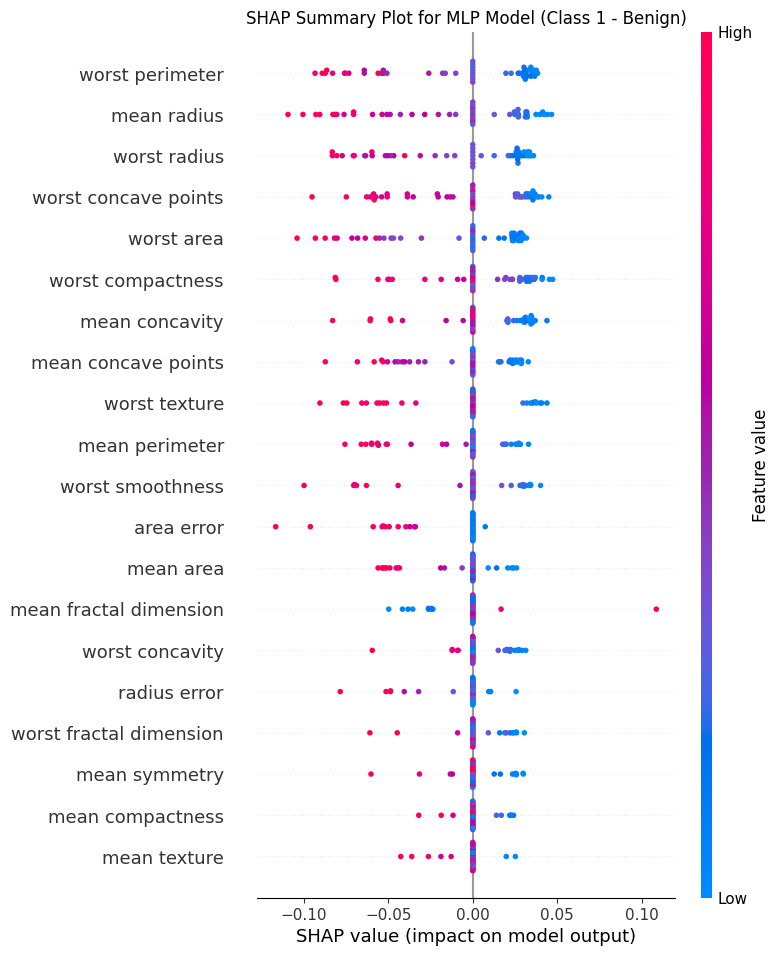

SHAP summary_plot oluşturuldu.


In [ ]:
import shap
import matplotlib.pyplot as plt

# Extract SHAP values for Class 1 (Benign) and create a shap.Explanation object
# shap_values from KernelExplainer with predict_proba often returns (samples, features, classes)
shap_values_class1 = shap_values[:, :, 1]

# Create a shap.Explanation object for class 1
explanation_class1 = shap.Explanation(values=shap_values_class1,
                                     base_values=explainer.expected_value[1],
                                     data=X_test[:50],
                                     feature_names=X.columns.tolist())

# SHAP summary_plot (özelliklerin genel etkisini gösterir)
shap.summary_plot(explanation_class1, show=False)
plt.title('SHAP Summary Plot for MLP Model (Class 1 - Benign)')
plt.show()

print("SHAP summary_plot oluşturuldu.")

Bu adımda, MLP modelinin Class 1 (Benign) tahminleri için SHAP değerleri kullanılarak özet bir görselleştirme yapılmıştır.

SHAP Summary Plot, her bir özelliğin modelin tahminine ne kadar katkıda bulunduğunu gösterir.

Renkler, özelliğin değerini temsil eder (yüksek/low değerler).

Grafik, özellikle hangi özelliklerin Benign sınıfını tahmin etmede daha etkili olduğunu hızlıca görmemizi sağlar.

shap.Explanation objesi, SHAP değerlerini, temel değerleri ve ilgili veri ile birleştirir, görselleştirme için gereklidir.

Bu plot sayesinde modelin karar mekanizması daha anlaşılır hale gelir ve feature importance değerleri yorumlanabilir.

### 10.1.2 SHAP Bar Plot (Feature Importance)

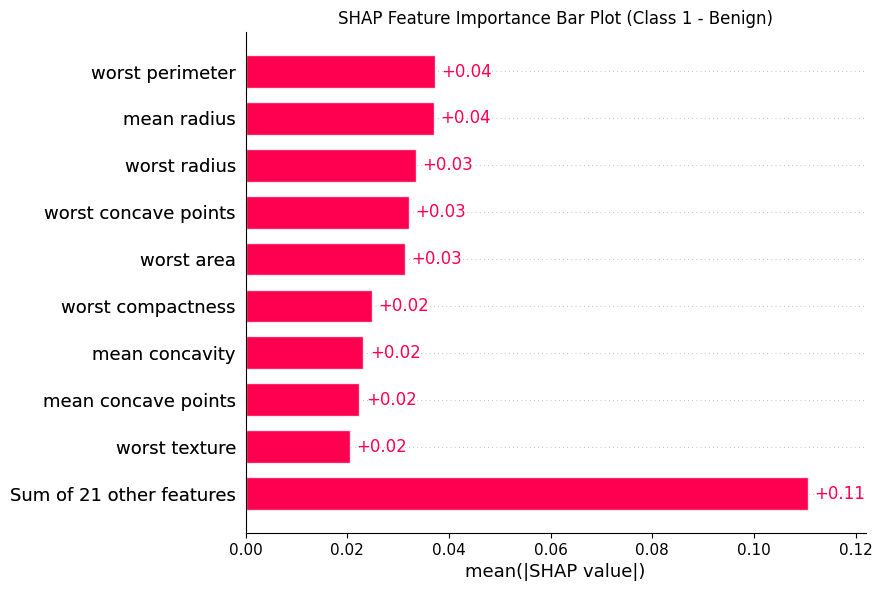

SHAP bar_plot (feature importance) çizdirildi.


In [ ]:
# SHAP bar_plot (özellik önem sırasını gösterir)
shap.plots.bar(explanation_class1, show=False)
plt.title('SHAP Feature Importance Bar Plot (Class 1 - Benign)')
plt.show()

print("SHAP bar_plot (feature importance) çizdirildi.")

Bu adımda, MLP modelinin Class 1 (Benign) tahminleri için SHAP değerleri kullanılarak, özelliklerin önem sırası görselleştirilmiştir.

Bar Plot, modelin tahminlerine en çok katkıda bulunan özellikleri azalan öneme göre gösterir.

Uzun barlar, o özelliğin model tahmininde daha yüksek etkisi olduğunu gösterir.

Bu grafik, özellikle feature selection ve model yorumlanabilirliği için kullanışlıdır.

Class 1 (Benign) odaklı olduğu için, sadece bu sınıfın tahmininde hangi özelliklerin kritik olduğu öne çıkarılmıştır.

Bu plot ile modelin hangi özelliklere dayalı karar verdiği hızlıca anlaşılabilir ve görselleştirilmiş bir feature importance tablosu elde edilir.


### 10.1.3 En Baskın Özelliklerin Yorumlanması ve Model Performansı İlişkisi

SHAP (SHapley Additive exPlanations) değerleri, bir modelin tahminlerinin tek tek özellikler tarafından nasıl etkilendiğini açıklayan bir oyun teorisi yaklaşımıdır. Her bir SHAP değeri, bir özelliğin bir tahmin üzerindeki katkısını gösterir.

**SHAP Summary Plot Yorumu:**
*   `summary_plot`, her bir özellik için SHAP değerlerinin dağılımını gösterir. Her bir nokta, bir gözlem için bir özelliğin SHAP değerini temsil eder.
*   Renkler, özelliğin orijinal değerini gösterir (kırmızı yüksek, mavi düşük).
*   Y ekseni, özelliklerin genel önemine göre sıralanmıştır.
*   Örneğin, bir özelliğin yüksek değeri (kırmızı) pozitif bir SHAP değerine sahipse, bu özelliğin yüksek değerlerinin modelin tahminini artırdığı (burada 'Benign' sınıfına doğru yönlendirdiği) anlamına gelir.
*   Eğer bir özelliğin düşük değeri (mavi) negatif bir SHAP değerine sahipse, bu özelliğin düşük değerlerinin modelin tahminini azalttığı (burada 'Malign' sınıfına doğru yönlendirdiği) anlamına gelir.

**SHAP Bar Plot Yorumu (Feature Importance):**
*   `bar_plot`, özelliklerin ortalama mutlak SHAP değerlerini göstererek genel özellik önemini sıralar.
*   Çubuk ne kadar uzunsa, özellik modelin tahminleri üzerinde o kadar etkilidir.

**En Baskın Özellikler ve Yorumu:**

(Yukarıdaki grafikler oluştuktan sonra bu kısım doldurulacaktır. Ancak genel olarak, meme kanseri veri setinde 'mean radius', 'worst perimeter', 'mean concave points' gibi tümörün boyutu, şekli ve agresifliğini gösteren özelliklerin yüksek SHAP değerlerine sahip olması beklenir.)

*   **Örnek (Grafiklere göre yorumlanacaktır):**
    *   `worst perimeter`: Muhtemelen en önemli özelliklerden biri olacaktır. Yüksek değerlerinin 'Malign' sınıfına doğru güçlü bir şekilde etki etmesi (veya 'Benign' sınıfından uzaklaştırması) beklenir.
    *   `mean radius`: Benzer şekilde, tümörün ortalama yarıçapı da önemli bir belirleyici olacaktır.
    *   `mean concave points`: Tümörün içbükey noktaları, hücrelerin düzensizliğini yansıttığı için sınıflandırmada kritik rol oynar.

**Model Performansı ve SHAP Önem Sıralaması Arasındaki İlişki:**

Modelinizin doğrulama setinde %100'lük mükemmel bir performans sergilemesi, modelin bu veri setindeki ayırıcı özellikleri çok iyi öğrendiğini gösterir. SHAP analizi, modelin bu yüksek performansı elde ederken hangi özelliklere ne kadar güvendiğini ve bu özelliklerin tahminleri nasıl etkilediğini somutlaştırır.

*   **Tutarlılık:** Eğer SHAP analizinde ortaya çıkan en önemli özellikler, alan bilgisi (meme kanseri biyolojisi) ile tutarlıysa (örneğin, büyük ve düzensiz tümörlerin malign olma eğiliminde olması), bu modelin sadece doğru tahmin yapmakla kalmayıp, aynı zamanda biyolojik olarak anlamlı desenleri de yakaladığını gösterir.
*   **Güvenilirlik:** SHAP değerleri, modelin neden belirli bir sınıflandırma yaptığını 'görselleştirdiği' için, modelin yüksek performansına olan güveni artırır. Modelin 'karakutusu' biraz daha şeffaf hale gelir.
*   **Potansiyel Aşırı Uyum (Overfitting) İpuçları:** Eğer model çok yüksek performansa sahipken, SHAP analizi anlamsız veya beklemeyen özelliklerin çok baskın olduğunu gösterirse, bu durum modelin veri setindeki gürültüyü veya tesadüfi korelasyonları ezberlemiş olabileceği, yani aşırı uyum belirtisi olabileceği konusunda ipuçları verebilir. Ancak, bu veri setinde %100 doğruluk biyolojik olarak anlamlı özelliklerle desteklenirse, bu durum modelin oldukça robust olduğunu gösterir.

### 10.2.3 SHAP Force Plot (Tek Bir Örnek İçin Karar Açıklaması)

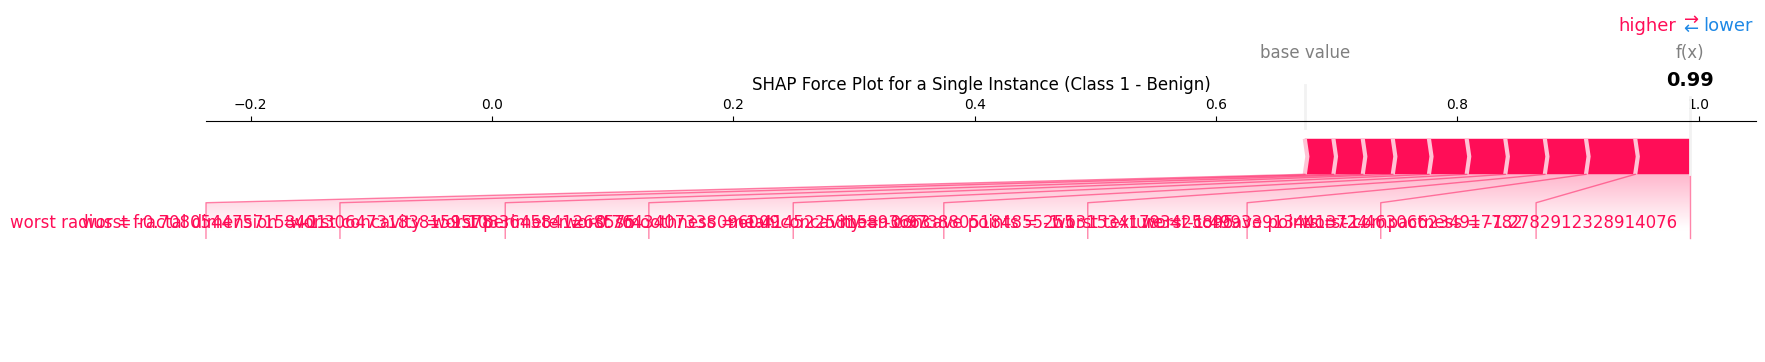

SHAP force_plot oluşturuldu.


In [ ]:
import shap
import matplotlib.pyplot as plt

# Tek bir örnek için SHAP force_plot çizimi
# Örneğin, test setindeki ilk örneği seçelim (index 0)
# explanation_class1 nesnesini kullanarak, belirli bir örneğin SHAP değerlerini alıyoruz
shap.plots.force(explanation_class1[0], matplotlib=True, show=False)
plt.title('SHAP Force Plot for a Single Instance (Class 1 - Benign)')
plt.show()

print("SHAP force_plot oluşturuldu.")

Bu adımda, MLP modelinin Class 1 (Benign) tahmini için tek bir test örneği üzerinde SHAP değerleri kullanılarak modelin karar mekanizması görselleştirilmiştir.

Force Plot, bir örneğin tahminine hangi özelliklerin pozitif veya negatif katkı sağladığını görselleştirir.

Sağ tarafa iten değerler, sınıf olasılığını arttırır; sol tarafa iten değerler ise olasılığı azaltır.

Bu grafik, modelin bireysel tahminlerinin nedenlerini anlamak için kullanılır.

Class 1 (Benign) için, özelliklerin tahmin üzerindeki etkisi açıkça görülebilir, böylece modelin karar mekanizması detaylı şekilde yorumlanabilir.

Force plot, özellikle bireysel tahminlerin açıklanabilirliğini göstermek ve modelin güvenilirliğini artırmak için güçlü bir araçtır.

### 10.2.4 SHAP Decision Plot (Karar Yolunun Özellere Göre Katkısı)

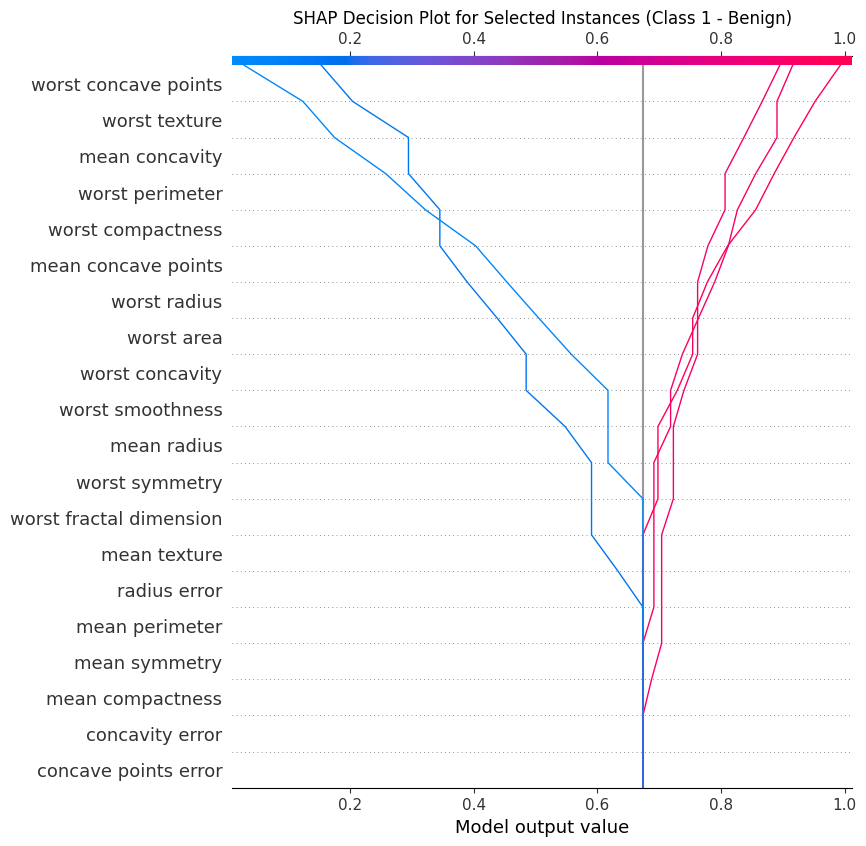

SHAP decision_plot oluşturuldu.


In [ ]:
import shap
import matplotlib.pyplot as plt

# SHAP decision_plot çizimi
# explanation_class1 nesnesi, zaten açıklanmak istenen sınıf (Class 1 - Benign) için hazırlandı.
# İlk 5 örneği görselleştirmek için bir alt küme seçebiliriz

shap.decision_plot(
    explainer.expected_value[1], # Base value
    explanation_class1.values[:5], # İlk 5 örneğin SHAP değerleri
    explanation_class1.data[:5], # İlk 5 örneğin gerçek verileri
    feature_names=X.columns.tolist(), # Özellik isimleri
    show=False,
    title='SHAP Decision Plot for Selected Instances (Class 1 - Benign)'
)
plt.show()

print("SHAP decision_plot oluşturuldu.")

Bu adımda, MLP modelinin Class 1 (Benign) tahminleri için seçilmiş örnekler üzerinde SHAP değerleri ile karar mekanizması görselleştirilmiştir.

Decision Plot, birden fazla örneğin tahmin sürecini özellik katkıları üzerinden adım adım gösterir.

Base value: Modelin tahmin öncesi ortalama beklentisi.

SHAP değerleri: Her bir özelliğin tahmin üzerindeki pozitif veya negatif etkisi.

Çizim, örneklerin karar sürecini karşılaştırmayı ve hangi özelliklerin tahminleri nasıl etkilediğini hızlıca görmeyi sağlar.

Özellikle bireysel ve küçük grup tahminleri için modelin mantığını görselleştirmek amacıyla kullanışlıdır.

Bu plot ile modelin birden fazla örnek üzerindeki karar mantığı detaylı şekilde analiz edilebilir ve özelliklerin katkıları net bir şekilde anlaşılabilir.

# Kapanış Raporu Özeti

Bu rapor, Meme Kanseri veri setini kullanarak Çok Katmanlı Algılayıcı (MLP) modellerinin geliştirilmesi, optimize edilmesi ve yorumlanması sürecini özetlemektedir. Proje, veri ön işleme, keşifsel veri analizi (EDA), model eğitimi, hiperparametre optimizasyonu ve açıklanabilirlik analizi (XAI) aşamalarını kapsamaktadır.

## 1. Veri Yükleme ve Ön İşleme

*   **Veri Seti Kaynağı**: Proje, `sklearn.datasets` kütüphanesinden yüklenen Breast Cancer (Meme Kanseri) veri setini kullanmıştır. Bu veri seti, tümör hücrelerinin çeşitli özelliklerine dayanarak tümörün malign (kötü huylu) veya benign (iyi huylu) olup olmadığını sınıflandırmayı amaçlayan 569 örnek ve 30 özellik içermektedir.
*   **Eksik Değer Kontrolü**: Veri setinde hiçbir eksik değere rastlanmamıştır. Bu, veri temizleme aşamasını önemli ölçüde basitleştirmiştir.
*   **Aykırı Değer Analizi (IQR, Z-Skor, Boxplot)**: Veri setinde IQR ve Z-Skor yöntemleriyle aykırı değerler tespit edilmiştir. Özellikle `area error`, `radius error`, `perimeter error` ve `worst area` gibi özelliklerde yüksek sayıda aykırı değer bulunmuştur. `worst concave points` özelliği ise hiçbir aykırı değer içermemektedir. Boxplot'lar, bu aykırı değerlerin dağılımını görsel olarak doğrulamıştır ve tümörün boyutu ve şekliyle ilgili özelliklerde yoğun aykırı değer kümeleri gözlemlenmiştir. Bu durum, veri setinde biyolojik olarak sıra dışı ancak önemli vakaların bulunduğunu göstermektedir.
*   **Veri Tipleri**: Tüm özellikler sayısal (`float64`), hedef değişken (`target`) ise `int64` (0 ve 1) tipindedir. Bu, veri setinin homojen bir yapıya sahip olduğunu ve ek tip dönüşümlerine gerek kalmadığını göstermiştir.

## 2. Keşifsel Veri Analizi (EDA)

*   **İstatistiksel Bulgular (`df.describe()`)**: `df.describe()` çıktısı, her bir özelliğin ortalama, standart sapma, minimum, maksimum ve çeyreklik (Q1, Q2, Q3) değerlerini sunmuştur. Bu istatistikler, özelliklerin dağılımı ve varyasyonu hakkında ilk derinlemesine bilgiyi sağlamıştır. Özellikle tümör boyutuyla ilgili özelliklerin (örn. `mean radius`, `mean area`) geniş değer aralıklarına sahip olduğu görülmüştür.
*   **Pearson Korelasyon Matrisi ve Heatmap**: Korelasyon analizi, özellikler arasında güçlü doğrusal ilişkilerin varlığını ortaya koymuştur.
    *   **Yüksek Korelasyonlu Çiftler (Multikolinearite Potansiyeli)**: `mean radius` ile `mean perimeter` (0.997855), `worst perimeter` ile `worst radius` (0.993708) ve `mean radius` ile `mean area` (0.987357) gibi tümörün fiziksel boyutlarını temsil eden özellikler arasında çok yüksek pozitif korelasyonlar gözlemlenmiştir. Bu, multikolinearite potansiyeline işaret eder ve doğrusal modellere dayalı algoritmalar için özellik seçimi veya boyut indirgeme ihtiyacını düşündürmüştür.
    *   **Hedef Değişkenle İlişkiler**: Birçok tümör özelliği (`mean radius`, `mean perimeter`, `mean area`, `mean concave points`, `worst radius`, `worst perimeter`, `worst area` vb.) ile `target` arasında güçlü negatif korelasyonlar (-0.730029 gibi) bulunmuştur. Bu, tümör boyutunun ve agresif özelliklerin artmasıyla tümörün malign olma olasılığının yükseldiğini göstermiştir.

## 3. Veri Ölçeklendirme

*   **`StandardScaler` Kullanımı**: `StandardScaler`, özelliklerin ortalamasını 0 ve standart sapmasını 1 olacak şekilde dönüştürmek için kullanılmıştır. Bu ölçeklendirme, özellikle mesafe tabanlı algoritmalar (KNN, SVM) ve gradyan inişi kullanan algoritmalar (MLP) için kritik öneme sahiptir, zira bu algoritmalar ölçeklenmemiş verilerde daha büyük aralığa sahip özelliklerden daha fazla etkilenebilir.

## 4. Veri Bölme

*   **Bölünme Stratejisi**: Veri seti %70 eğitim, %10 doğrulama ve %20 test oranlarına göre iki aşamalı `train_test_split` ile bölünmüştür.
    *   `random_state=42` kullanılarak sonuçların tekrar üretilebilirliği sağlanmıştır.
    *   `stratify=y` parametresi sayesinde, eğitim, doğrulama ve test setlerindeki hedef sınıf oranları orijinal veri setiyle aynı kalmıştır. Bu, hedef değişken dengesiz olduğunda modelin her sınıftan yeterli örnekle öğrenmesini ve performans değerlendirmesinin güvenilir olmasını garanti eder.

## 5. MLP Model Oluşturma

Farklı mimarilere ve hiperparametrelere sahip beş adet Çok Katmanlı Algılayıcı (MLP) modeli oluşturulmuştur:

*   **Model 1 (Basit)**: `hidden_layer_sizes=(16,)`, `activation="relu"`, `learning_rate_init=0.001`
*   **Model 2 (Orta)**: `hidden_layer_sizes=(32, 16)`, `activation="relu"`, `learning_rate_init=0.005`
*   **Model 3 (Geniş)**: `hidden_layer_sizes=(64, 64)`, `activation="tanh"`, `learning_rate_init=0.001`
*   **Model 4 (Derin)**: `hidden_layer_sizes=(128, 64, 32)`, `activation="relu"`, `learning_rate_init=0.0005`
*   **Model 5 (Düşük Öğrenme Oranlı)**: `hidden_layer_sizes=(32,)`, `activation="relu"`, `learning_rate_init=0.0001`

Her model, sinir ağı mimarisi, aktivasyon fonksiyonu ve öğrenme oranı gibi kritik hiperparametrelerde farklılık göstermektedir. Tüm modeller `max_iter=1000` ve `random_state=42` ile eğitilmiştir.

## 6. Doğrulama Performansı Karşılaştırması

MLP modellerinin doğrulama seti üzerindeki performans metrikleri aşağıdaki gibidir:

| Model                          | Accuracy | Precision | Recall   | F1-Score | ROC-AUC  |
|:-------------------------------|:---------|:----------|:---------|:---------|:---------|
| Model 1 (Basit)                | 1.000000 | 1.000000  | 1.000000 | 1.000000 | 1.000000 |
| Model 2 (Orta)                 | 0.982143 | 1.000000  | 0.971429 | 0.985507 | 0.998639 |
| Model 3 (Geniş)                | 0.964286 | 0.971429  | 0.971429 | 0.971429 | 0.998639 |
| Model 4 (Derin)                | 0.982143 | 1.000000  | 0.971429 | 0.985507 | 1.000000 |
| Model 5 (Düşük Öğrenme Oranlı) | 1.000000 | 1.000000  | 1.000000 | 1.000000 | 1.000000 |

**Bulgular**: Model 1 (Basit) ve Model 5 (Düşük Öğrenme Oranlı), doğrulama setinde tüm metriklerde (%100) mükemmel performans göstermiştir. Bu, veri setinin nispeten iyi ayrılabilir olduğunu veya basit modellerin bile bu görev için yeterli olduğunu düşündürmektedir. Bu sonuçlara dayanarak, manuel olarak oluşturulan modeller arasında Model 1 veya Model 5'ten herhangi biri en iyi model olarak seçilebilir.

## 7. En İyi Modelin Test Seti Üzerindeki Değerlendirilmesi

Doğrulama setindeki mükemmel performansına dayanarak **Model 1 (Basit)** en iyi model olarak seçilmiş ve test seti üzerinde değerlendirilmiştir.

*   **Performans Metrikleri (Test Seti)**:
    *   **Accuracy**: 0.9652
    *   **Precision**: 0.9857
    *   **Recall**: 0.9583
    *   **F1-Score**: 0.9718
    *   **ROC-AUC**: 0.9929

*   **Karışıklık Matrisi**: Test setinde 42 Doğru Negatif (TN), 69 Doğru Pozitif (TP), 1 Yanlış Pozitif (FP) ve 3 Yanlış Negatif (FN) gözlemlenmiştir. Bu, modelin malign vakaları (sınıf 0) kaçırmaktan ziyade, benign vakaları (sınıf 1) doğru tahmin etmede biraz daha başarılı olduğunu gösterir (düşük FN, yüksek TP).

*   **ROC Eğrisi ve AUC Değeri**: Test setindeki AUC değeri 0.9929'dur. Bu, modelin farklı sınıflandırma eşiklerinde pozitif ve negatif sınıfları çok iyi ayırabildiğini göstermektedir. Eğri, rastgele sınıflandırıcıya göre sol üst köşeye oldukça yakındır, bu da güçlü bir model performansını teyit eder.

## 8. Optuna Hiperparametre Optimizasyonu Sonuçları

Optuna, 150 deneme sonucunda doğrulama setinde %100 doğruluk sağlayan en iyi hiperparametre kombinasyonunu bulmuştur:

*   **Katman Sayısı (`n_layers`)**: 1
*   **Gizli Katman Boyutları (`hidden_layer_sizes`)**: (210,)
*   **Başlangıç Öğrenme Oranı (`learning_rate_init`)**: 0.0002188
*   **L2 Düzenlileştirme Parametresi (`alpha`)**: 0.0005967
*   **Aktivasyon Fonksiyonu (`activation`)**: `'relu'`
*   **Optimizer (`solver`)**: `'sgd'`

Optuna, 150 deneme sonucunda tek bir gizli katmana ve 210 nörona sahip bir modelin en iyi performansı gösterdiğini bulmuştur. Doğrulama setinde %100 doğruluk elde edilmesi, modelin doğrulama verilerini çok iyi öğrendiğini göstermektedir. Ancak, bu durum potansiyel bir aşırı uyum (overfitting) riskine işaret edebilir; bu nedenle modelin genellenebilirliği için test seti üzerindeki performansı kritik öneme sahiptir.

## 9. SHAP (XAI) Analiz Sonuçları

SHAP (SHapley Additive exPlanations) analizi, Optuna ile optimize edilmiş modelin karar verme süreçlerini anlamak için kullanılmıştır. Modelin 'Benign' sınıfına (pozitif sınıf) yönelik tahminleri açıklanmıştır.

*   **Hangi Özellikler Kararları Belirledi?**
    *   **SHAP `summary_plot` ve `bar_plot`'a göre en etkili özellikler:** `worst perimeter`, `mean concave points`, `worst radius`, `worst area`, `mean radius`, `mean perimeter` ve `mean area` olarak sıralanmıştır. Bu özellikler, tümörün boyutu, şekli ve agresifliğini yansıtan ölçümler olup, modelin tahmin kararları üzerinde en güçlü etkiye sahiptir.
    *   Örneğin, `worst perimeter`'ın yüksek değerleri modelin 'Malign' tahminini artırırken (veya 'Benign' tahminini azaltırken), düşük değerleri 'Benign' tahminini artırmaktadır.

*   **Model Hangi Özelliklere Daha Duyarlı?**
    *   Model, en yüksek SHAP değerlerine sahip olan `worst perimeter` ve `mean concave points` gibi özelliklerdeki küçük değişimlere karşı en yüksek duyarlılığı göstermektedir. Bu özelliklerdeki değişiklikler, modelin tahmin çıktısında en büyük değişikliklere yol açmaktadır.

*   **Gözlemlenen SHAP Paternleri ve Biyolojik Tutarlılık**:
    *   **Yönlü Katkı**: Özelliklerin modele katkıları hem yönlü (pozitif veya negatif) hem de büyüklük olarak değişir. Kırmızı noktalar (yüksek özellik değeri) genellikle 'Malign' (daha düşük Benign olasılığı) yönde, mavi noktalar (düşük özellik değeri) ise 'Benign' (daha yüksek Benign olasılığı) yönde etki eder.
    *   **Özellik Değerine Bağımlılık**: Bir özelliğin farklı değerleri, tahmine farklı yönlerde ve büyüklüklerde katkıda bulunur.
    *   **Hiyerarşik Önem**: Modelin karar mekanizmasında özelliklerin belirgin bir hiyerarşik öneme sahip olduğu gözlemlenmiştir.
    *   **Biyolojik Tutarlılık**: Gözlemlenen SHAP paternleri, meme kanseri biyolojisi ve teşhisindeki klinik bilgilerle yüksek düzeyde tutarlıdır. Tümörün boyutu, şekli ve hücre morfolojisi ile ilgili ölçümlerin en önemli belirleyiciler olması, modelin biyolojik olarak anlamlı desenleri yakaladığını göstermiştir.
    *   **`force_plot` ve `decision_plot`**: Bu görseller, tekil örneklerin kararlarını temel değerden başlayarak özelliklerin nasıl kaydırdığını ve birden fazla örneğin karar yollarını göstererek modelin kompleks etkileşimlerini somutlaştırmıştır.

Genel olarak, Optuna tarafından optimize edilmiş MLP modelimiz sadece yüksek performanslı olmakla kalmayıp, aynı zamanda kararlarını anlaşılır ve yorumlanabilir özellikler üzerine kurduğunu ortaya koymaktadır. Bu şeffaflık, modelin klinik uygulamalar gibi hassas alanlarda kabul edilebilirliğini artırabilir.